In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
p2p_lending= pd.read_csv("Bondora_raw.csv",low_memory=False)
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [2]:
p2p_lending.isna().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [3]:
p2p_lending.isna().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [4]:
p2p_lending_num=p2p_lending.select_dtypes(include=['int64','float64'])
p2p_lending_num

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,659,0,0,115.0410,17,5,2.0,1,61,1.0,319.5582,115.0408,30.00,12,NaN,7,3.0,1.0,3.0,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,1800.0000,319.0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,0.0,0.00
1,654,0,0,140.6057,20,4,2.0,1,48,1.0,191.7349,140.6057,25.00,1,NaN,7,5.0,4.0,3.0,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,2200.0000,45.8300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,0.0,0.00
2,641,0,0,319.5580,20,6,2.0,1,58,1.0,319.5582,319.5409,25.00,20,NaN,2,4.0,1.0,3.0,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,319.5409,197.2926,2813.0,2935.0,NaN,NaN,NaN,NaN,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,NaN,NaN,NaN,NaN,203.1909,59.7626,0.00,0.00,116.35,414.07,0,0.0000,0.0000,0.0,0,NaN,NaN,0.0,0.00
3,668,0,0,57.5205,12,7,2.0,1,23,1.0,127.8233,57.5205,45.00,15,NaN,0,2.0,3.0,NaN,1.0,NaN,11000.0,0.0,0.0,0.0,0.0,0.0,600.0,11600.0,0,0.00,0,0.00,0.00,15,900.0000,293.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5205,18.7323,0.00,0.00,0.00,0.00,1,134.2144,0.0000,0.0,0,NaN,NaN,0.0,0.00
4,652,0,0,319.5582,10,4,2.0,1,25,1.0,319.5582,319.5436,30.00,12,NaN,6,4.0,2.0,3.0,7.0,NaN,6800.0,0.0,0.0,0.0,0.0,0.0,0.0,6800.0,0,0.00,0,0.00,0.00,25,5000.0000,833.8100,NaN,3835.0,NaN,NaN,NaN,NaN,NaN,247.76,29.84,319.5436,319.5436,319.5436,220.42,NaN,NaN,NaN,NaN,NaN,319.5436,220.4200,0.00,2.40,0.00,0.00,1,146.9966,0.0000,0.0,0,NaN,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,283484,2515,0,485.0000,16,6,3.0,4,37,0.0,3000.0000,3000.0000,31.01,60,107.68,0,3.0,3.0,3.0,1.0,5.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,1,500.00,0,7.69,792.32,1,1411.6000,3000.0000,1791.0,1791.0,0.146732,0.90,0.163368,0.125412,0.00,2860.87,2779.85,3000.0000,3000.0000,2308.1900,0.00,2.0,1.0,NaN,0.146732,NaN,2308.1900,0.0000,691.81,1552.18,0.00,0.00,0,0.0000,0.0000,0.0,0,NaN,NaN,0.0,1040.06
134525,285168,1880,0,1120.0000,16,2,3.0,4,35,0.0,3000.0000,3000.0000,18.25,60,85.33,2,3.0,3.0,3.0,8.0,1.0,2265.0,0.0,0.0,0.0,0.0,0.0,0.0,2265.0,5,1777.46,0,31.58,520.67,7,0.0000,16.3200,NaN,NaN,0.053246,0.90,0.129254,0.045510,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.053246,NaN,3000.0000,1990.0300,0.00,0.00,0.00,0.00,1,3000.0000,389.3600,0.0,0,NaN,NaN,0.0,

In [5]:
p2p_lending_bool=p2p_lending.select_dtypes(include=['bool'])
p2p_lending_bool

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,True,True,False
1,False,True,False
2,True,True,True
3,True,True,False
4,True,True,False
...,...,...,...
134524,True,True,False
134525,False,True,False
134526,True,True,False
134527,False,True,True


In [6]:
p2p_lending_obj=p2p_lending.select_dtypes(include=['object'])
p2p_lending_obj

,ReportAsOfEOD,LoanId,ListedOnUTC,BiddingStartedOn,UserName,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,DateOfBirth,Country,County,City,NrOfDependants,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,LastPaymentOn,DebtOccuredOn,DebtOccuredOnForSecondary,DefaultDate,StageActiveSince,Rating,Rating_V0,Rating_V1,Rating_V2,Status,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,GracePeriodStart,GracePeriodEnd,NextPaymentDate,ReScheduledOn,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,2009-06-11 16:40:39,2009-06-11 16:40:39,KARU,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,1947-11-26,EE,HARJU,TALLINN,0,UpTo3Years,klienditeenindaja,MoreThan25Years,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,NaN,91-120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,2009-06-10 15:48:57,2009-06-10 15:48:57,koort681,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,1960-11-05,EE,IDA-VIRU,KOHTLA-JARVE,0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,2009-06-05 19:12:29,2009-06-05 19:12:29,0ie,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,1950-11-13,EE,PÄRNU,PÄRNU,0,UpTo4Years,teenindaja,MoreThan25Years,2012-10-01,2012-05-14,2012-01-13,2012-07-16,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,Late,180+,180+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,2009-06-13 12:01:20,2009-06-13 12:01:20,Alyona,2009-06-13 12:01:20,2009-06-15,2010-09-15,2009-07-15,2010-09-15,2010-09-15,1986-03-29,EE,HARJU,PALDISKI,1,UpTo2Years,juhtmekoitja,2To5Years,2010-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,NaN,31-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,2009-06-10 10:17:13,2009-06-10 10:17:13,Kai,2009-06-10 10:17:13,2009-06-14,2016-07-28,2009-07-27,2010-06-25,2010-06-25,1983-09-30,EE,TARTU,TARTU,0,UpTo2Years,klienditeenindaja,5To10Years,2015-07-16,NaN,2009-07-27,2009-09-28,NaN,NaN,NaN,NaN,NaN,Repaid,NaN,180+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,2015-01-02 16:31:36,2015-01-02 16:31:36,BO73K5A6A,2015-01-01 07:17:03,2015-01-06,2019-02-13,2015-03-02,2020-02-03,2020-02-03,1977-02-07,FI,PÄIJÄT-HÄME,LAHTI,0,MoreThan5Years,Worker,15To25Years,2019-02-12,2015-03-02,2015-03-02,2015-05-04,2018-12-21 10:08:52,E,NaN,E,HR,Repaid,180+,180+,NaN,NaN,RL2,NaN,NaN,NaN,NaN,180+
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,2015-01-05 16:14:26,2015-01-05 16:14:26,BO311A49,2015-01-05 07:56:22,2015-01-06,2019-02-07,2015-03-05,2020-02-05,2019-02-20,1979-05-17,FI,POHJOIS KARJAALA,JOENSUU,0,MoreThan5Years,MiddleManager,15To25Years,2019-02-07,NaN,NaN,NaN,2018-07-23 17:00:07.437000000,B,NaN,B,E,Repaid,NaN,31-60,NaN,NaN,RL2,2017-06-27,2018-06-20,NaN,NaN,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,2015-01-02 14:04:27,2015-01-02 14:04:27,BO41K639A,2014-12-28 15:01:47,2015-01-06,NaN,2015-03-02,2020-02-03,2020-02-03,1974-01-25,FI,VARSINAIS-SUOMI,SAUVO,1,MoreThan5Years,Owner,5To10Years,2020-01-17,2015-06-01,2015-06-01,2015-08-04,2019-02-28 17:02:53,D,NaN,D,HR,Late,180+,180+,NaN,NaN,RL2,NaN,NaN,NaN,NaN,8-15
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,2015-01-05 16:56:12,2015-01-05 16:56:12,BO45A925,2015-01-05 15:01:18,2015-01-06,2019-12-23,2015-03-02,2020-02-03,2020-08-03,1967-01-28,EE,VALGA,VALGA,1,MoreThan5Years,Worker,MoreThan25Years,2019-12-20,2016-06-17,2016-04-01,2016-06-17,2017-12-29 17:51:02,B,NaN,B,B,Repaid,180+,180+,NaN,NaN,NaN,2016-04-01,2016-10-03

In [7]:
p2p_lending.dtypes

ReportAsOfEOD                           object
LoanId                                  object
LoanNumber                               int64
ListedOnUTC                             object
BiddingStartedOn                        object
                                        ...   
NrOfScheduledPayments                  float64
ReScheduledOn                           object
PrincipalDebtServicingCost             float64
InterestAndPenaltyDebtServicingCost    float64
ActiveLateLastPaymentCategory           object
Length: 112, dtype: object

In [8]:
p2p_lending[p2p_lending["Rating_V0"].isna()]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.00,0.00,116

In [9]:
p2p_lending.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134529.000000,134529.000000,127844.000000,134529.000000,134484.000000,134484.000000,134332.000000,134443.000000,132877.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,1.345290e+05,134529.000000,1.345290e+05,134529.000000,134484.000000,134484.000000,134529.000000,54459.000000,130587.000000,48518.000000,52250.000000,131893.000000,131893.000000,131893.000000,131893.000000,119692.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,77241.000000,131893.000000,4569.000000,12922.000000,71722.00000,134529.000000,134529.000000,59129.000000,59129.000000,134529.000000,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,2727.947540,2543.872472,35.889583,46.151573,119.083443,0.343026,3.680713,-0.109165,0.153716,1.381708,3.357511,437.143384,18.802698,5.682848,2.390005,3.253239,2.359142,43.112825,1.724150e+03,3.181797,5.620270e+02,0.187313,7.769024,122.239119,11.143188,994.558014,708.883798,593.448019,612.733053,0.149255,0.409065,0.136558,0.252434,232.959918,849.838695,1099.982243,2351.471556,1909.285140,336.213893,15.150365,1.473440,4.718408,0.192519,0.186687,952.37584,761.476162,488.397102,24.574728,86.820368,1769.281104,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,2374.439168,2170.128183,26.288644,15.202688,114.737919,3.311925,1.174134,1.555404,1.940581,4.880079,2.844225,1786.569939,150.849487,38.385899,36.791193,77.523767,28.459953,459.081430,4.970166e+03,3.424242,3.383163e+04,0.896455,16.259688,692.480442,7.044104,1654.973527,1276.371901,569.495276,607.882018,0.119853,0.314768,0.075794,0.149629,721.414596,1271.781752,1514.736356,2084.825355,1939.821339,825.994549,177.149905,0.499297,1.883788,0.187765,0.170862,102.71751,1371.557801,827.805133,243.837975,781.437462,2030.546309,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,31.955800,6.390000,3.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0000

In [10]:
p2p_lending.dtypes

ReportAsOfEOD                           object
LoanId                                  object
LoanNumber                               int64
ListedOnUTC                             object
BiddingStartedOn                        object
                                        ...   
NrOfScheduledPayments                  float64
ReScheduledOn                           object
PrincipalDebtServicingCost             float64
InterestAndPenaltyDebtServicingCost    float64
ActiveLateLastPaymentCategory           object
Length: 112, dtype: object

array([[<AxesSubplot: title={'center': 'LoanNumber'}>,
        <AxesSubplot: title={'center': 'BidsPortfolioManager'}>,
        <AxesSubplot: title={'center': 'BidsApi'}>,
        <AxesSubplot: title={'center': 'BidsManual'}>,
        <AxesSubplot: title={'center': 'ApplicationSignedHour'}>,
        <AxesSubplot: title={'center': 'ApplicationSignedWeekday'}>,
        <AxesSubplot: title={'center': 'VerificationType'}>,
        <AxesSubplot: title={'center': 'LanguageCode'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'AppliedAmount'}>,
        <AxesSubplot: title={'center': 'Amount'}>,
        <AxesSubplot: title={'center': 'Interest'}>,
        <AxesSubplot: title={'center': 'LoanDuration'}>,
        <AxesSubplot: title={'center': 'MonthlyPayment'}>,
        <AxesSubplot: title={'center': 'UseOfLoan'}>],
       [<AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'cen

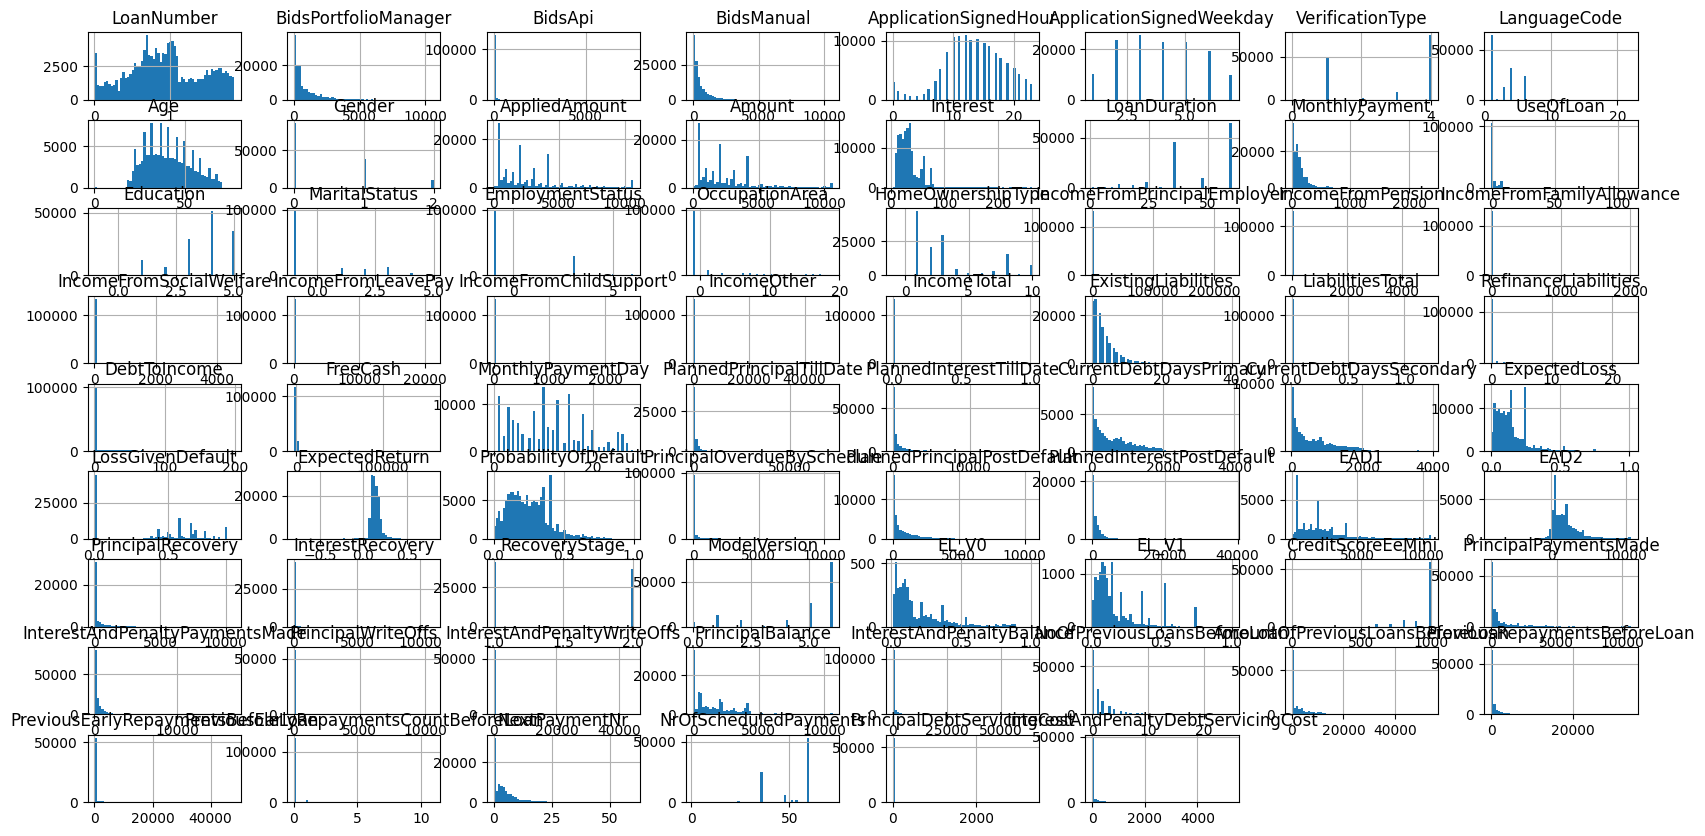

In [11]:
p2p_lending.hist(bins=60,figsize=(20,10))

<AxesSubplot: xlabel='Age', ylabel='Count'>

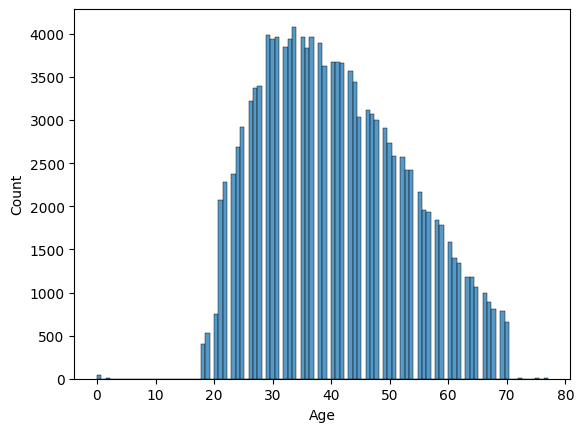

In [12]:
sns.histplot(p2p_lending['Age'])

In [13]:
#sns.kdeplot(p2p_lending['MonthlyPayment'],fill = True)

In [14]:
p2p_lending['MonthlyPayment'].value_counts()

0.00      3627
237.84    2321
113.31    2134
138.34    1628
184.45    1377
          ... 
322.43       1
594.12       1
441.24       1
910.90       1
126.31       1
Name: MonthlyPayment, Length: 25281, dtype: int64

In [15]:
#print(p2p_lending[p2p_lending.MonthlyPayment>500])

<AxesSubplot: xlabel='AppliedAmount', ylabel='Amount'>

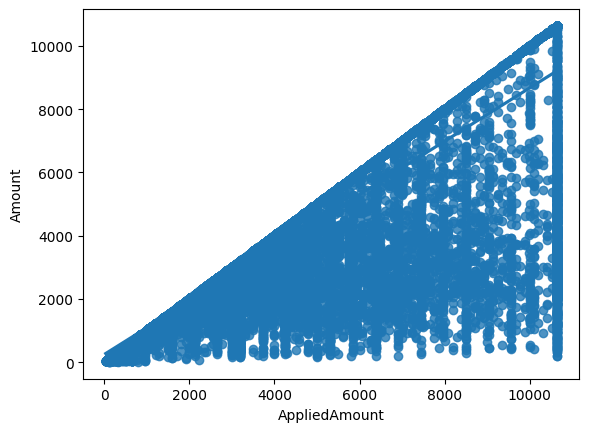

In [16]:
sns.regplot(x=p2p_lending['AppliedAmount'], y=p2p_lending['Amount'])

<AxesSubplot: xlabel='IncomeFromPrincipalEmployer', ylabel='AppliedAmount'>

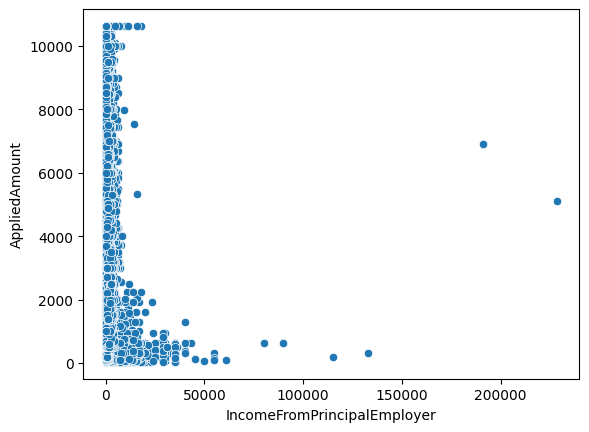

In [17]:
sns.scatterplot(x=p2p_lending['IncomeFromPrincipalEmployer'], y=p2p_lending['AppliedAmount'])    

<AxesSubplot: xlabel='AppliedAmount', ylabel='Count'>

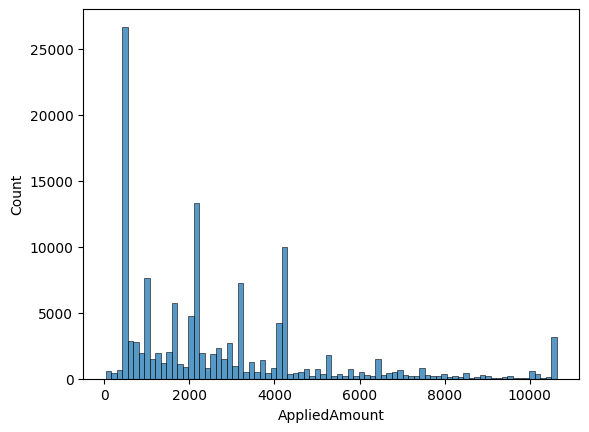

In [18]:
sns.histplot(p2p_lending['AppliedAmount'])

<AxesSubplot: xlabel='Amount', ylabel='Count'>

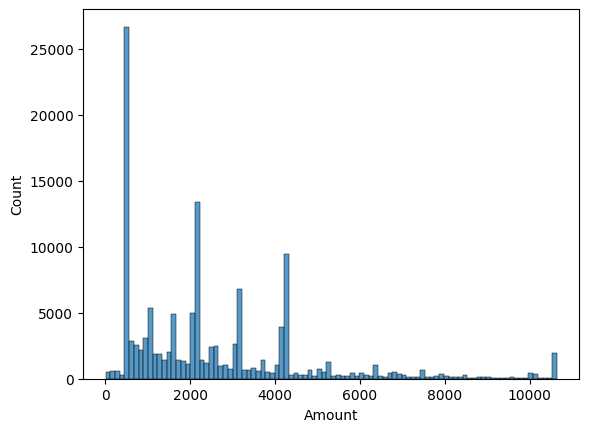

In [19]:
sns.histplot(p2p_lending['Amount'])

<AxesSubplot: xlabel='Interest', ylabel='Count'>

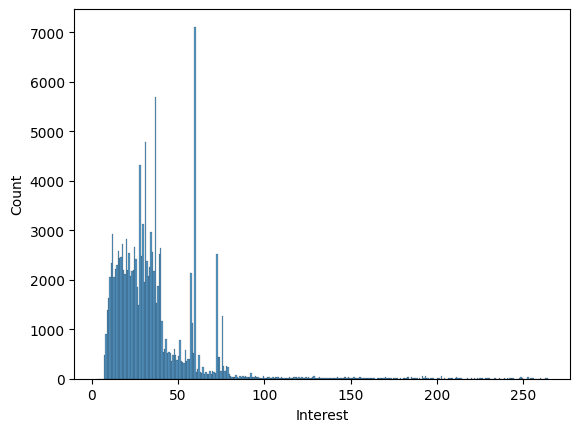

In [20]:
sns.histplot(p2p_lending['Interest'])

<AxesSubplot: xlabel='LoanDuration', ylabel='Count'>

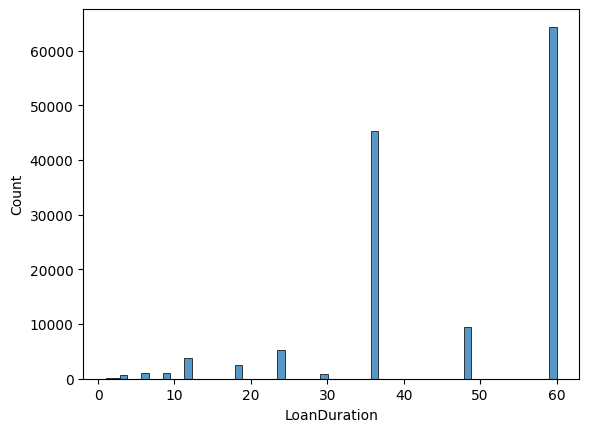

In [21]:
sns.histplot(p2p_lending['LoanDuration'])
#Duration of the Loan means the period commencing
#on drawdown of the Loan and expiring on the date on which the Loan is repaid in full
#Noticed that 0-10 days has low values also it doesn't make sense to repay loan in just 10 days

In [22]:
#sns.histplot(p2p_lending['DebtToIncome'])
#sns.lineplot(data=p2p_lending['DebtToIncome'])
#Ratio of borrower's monthly gross income that goes toward paying loans ???

In [23]:
#sns.kdeplot(data=p2p_lending['DebtToIncome'], fill=True)

In [24]:
p2p_lending['CreditScoreEeMini'].value_counts()

1000.0    56046
800.0      5718
900.0      4887
700.0      2532
600.0      2462
500.0        76
0.0           1
Name: CreditScoreEeMini, dtype: int64

In [25]:
p2p_lending['CreditScoreFiAsiakasTietoRiskGrade'].value_counts()

3      11452
4       7515
RL2     4125
2       3225
5       2871
RL1     1663
1        611
6        398
RL3      369
RL4      147
RL5      113
7         27
RL0        1
8          1
Name: CreditScoreFiAsiakasTietoRiskGrade, dtype: int64

In [26]:
p2p_lending.CreditScoreFiAsiakasTietoRiskGrade = p2p_lending['CreditScoreFiAsiakasTietoRiskGrade'].replace(['3','4','2','5','1'],['RL3','RL4','RL2','RL5','RL1'])

In [27]:
p2p_lending['CreditScoreFiAsiakasTietoRiskGrade'].value_counts()

RL3    11821
RL4     7662
RL2     7350
RL5     2984
RL1     2274
6        398
7         27
RL0        1
8          1
Name: CreditScoreFiAsiakasTietoRiskGrade, dtype: int64

In [28]:
values = ['7', 'RL0','8']
p2p_lending = p2p_lending[p2p_lending.CreditScoreFiAsiakasTietoRiskGrade.isin(values) == False]

In [29]:
p2p_lending['CreditScoreFiAsiakasTietoRiskGrade'].value_counts()

RL3    11821
RL4     7662
RL2     7350
RL5     2984
RL1     2274
6        398
Name: CreditScoreFiAsiakasTietoRiskGrade, dtype: int64

In [30]:
p2p_lending['CreditScoreFiAsiakasTietoRiskGrade'].astype('object')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
134524    RL2
134525    RL2
134526    RL2
134527    NaN
134528    NaN
Name: CreditScoreFiAsiakasTietoRiskGrade, Length: 134500, dtype: object

In [31]:
p2p_lending['Education'].value_counts()

 4.0    51324
 5.0    35388
 3.0    29250
 1.0    12054
 2.0     6427
 0.0        8
-1.0        4
Name: Education, dtype: int64

In [32]:
values = [0, -1,8]
p2p_lending = p2p_lending[p2p_lending.Education.isin(values) == False]

In [33]:
p2p_lending['Education'].value_counts()

4.0    51324
5.0    35388
3.0    29250
1.0    12054
2.0     6427
Name: Education, dtype: int64

In [34]:
p2p_lending['EmploymentStatus'].value_counts()

-1.0    97914
 3.0    30059
 5.0     2007
 6.0     1800
 4.0     1303
 2.0     1184
 0.0       24
Name: EmploymentStatus, dtype: int64

In [35]:
p2p_lending.EmploymentStatus = p2p_lending['EmploymentStatus'].replace([-1],1.0)
values = [0]
p2p_lending = p2p_lending[p2p_lending.EmploymentStatus.isin(values) == False]

In [36]:
p2p_lending['EmploymentStatus'].value_counts()

1.0    97914
3.0    30059
5.0     2007
6.0     1800
4.0     1303
2.0     1184
Name: EmploymentStatus, dtype: int64

In [37]:
p2p_lending['Gender'].value_counts()

0.0    85607
1.0    38192
2.0    10620
Name: Gender, dtype: int64

In [38]:
p2p_lending['HomeOwnershipType'].value_counts()

1.0     47319
3.0     29562
2.0     20774
8.0     15451
10.0     7954
4.0      4579
7.0      3335
6.0      1618
5.0      1441
9.0       741
0.0        38
Name: HomeOwnershipType, dtype: int64

In [39]:
values = [0,-1]
p2p_lending = p2p_lending[p2p_lending.HomeOwnershipType.isin(values) == False]

In [40]:
p2p_lending['HomeOwnershipType'].value_counts()

1.0     47319
3.0     29562
2.0     20774
8.0     15451
10.0     7954
4.0      4579
7.0      3335
6.0      1618
5.0      1441
9.0       741
Name: HomeOwnershipType, dtype: int64

In [41]:
p2p_lending['LanguageCode'].value_counts()

1     64244
4     32126
6     24099
3     12683
2       964
9       294
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: LanguageCode, dtype: int64

In [42]:
values = [22,15,10,13,21,7]
p2p_lending = p2p_lending[p2p_lending.LanguageCode.isin(values) == False]

In [43]:
p2p_lending['LanguageCode'].value_counts()

1    64244
4    32126
6    24099
3    12683
2      964
9      294
5        5
Name: LanguageCode, dtype: int64

In [44]:
p2p_lending['MaritalStatus'].value_counts()

-1.0    97912
 3.0    12387
 1.0    10728
 2.0     9375
 4.0     3370
 5.0      598
Name: MaritalStatus, dtype: int64

In [45]:
values = [0]
p2p_lending = p2p_lending[p2p_lending.MaritalStatus.isin(values) == False]
p2p_lending.MaritalStatus = p2p_lending['MaritalStatus'].replace([-1.0],['MISSING'])

In [46]:
p2p_lending['MaritalStatus'].value_counts()

MISSING    97912
3.0        12387
1.0        10728
2.0         9375
4.0         3370
5.0          598
Name: MaritalStatus, dtype: int64

In [47]:
p2p_lending['NewCreditCustomer'].value_counts()

True     77718
False    56697
Name: NewCreditCustomer, dtype: int64

In [48]:
p2p_lending['OccupationArea'].value_counts()

-1.0     97963
 1.0      8401
 7.0      3583
 6.0      3309
 3.0      3188
 8.0      2455
 17.0     2418
 9.0      2258
 10.0     1927
 15.0     1681
 16.0     1429
 11.0     1148
 19.0      998
 14.0      842
 18.0      619
 4.0       587
 13.0      564
 12.0      477
 5.0       361
 2.0       121
Name: OccupationArea, dtype: int64

In [49]:
values = [0]
p2p_lending = p2p_lending[p2p_lending.OccupationArea.isin(values) == False]
p2p_lending.OccupationArea = p2p_lending['OccupationArea'].replace([-1.0],['MISSING'])

In [50]:
p2p_lending['OccupationArea'].value_counts()

MISSING    97963
1.0         8401
7.0         3583
6.0         3309
3.0         3188
8.0         2455
17.0        2418
9.0         2258
10.0        1927
15.0        1681
16.0        1429
11.0        1148
19.0         998
14.0         842
18.0         619
4.0          587
13.0         564
12.0         477
5.0          361
2.0          121
Name: OccupationArea, dtype: int64

In [51]:
p2p_lending['RecoveryStage'].value_counts()

1.0    40660
2.0    36510
Name: RecoveryStage, dtype: int64

In [52]:
p2p_lending['UseOfLoan'].value_counts()

-1      97912
 7       9682
 2       9179
 0       6889
 6       3144
 3       1947
 5       1784
 8       1515
 4       1364
 1        954
 102       17
 110       14
 104        6
 101        5
 107        2
 106        1
Name: UseOfLoan, dtype: int64

In [53]:
values = [110]
p2p_lending = p2p_lending[p2p_lending.UseOfLoan.isin(values) == False]
p2p_lending.UseOfLoan = p2p_lending['UseOfLoan'].replace([-1.0],['MISSING'])

In [54]:
p2p_lending['UseOfLoan'].value_counts()

MISSING    97912
7           9682
2           9179
0           6889
6           3144
3           1947
5           1784
8           1515
4           1364
1            954
102           17
104            6
101            5
107            2
106            1
Name: UseOfLoan, dtype: int64

In [55]:
p2p_lending['VerificationType'].value_counts()

4.0    74517
1.0    48636
3.0     9417
2.0     1800
Name: VerificationType, dtype: int64

In [56]:
p2p_lending

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.00,0.00,116

In [57]:
p2p_lending.GracePeriodStart

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
134524           NaN
134525    2017-06-27
134526           NaN
134527    2016-04-01
134528    2015-09-14
Name: GracePeriodStart, Length: 134401, dtype: object

In [58]:
p2p_lending.GracePeriodEnd

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
134524           NaN
134525    2018-06-20
134526           NaN
134527    2016-10-03
134528    2016-03-14
Name: GracePeriodEnd, Length: 134401, dtype: object

In [59]:
p2p_lending.NrOfScheduledPayments

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
134524     NaN
134525     NaN
134526    60.0
134527     NaN
134528    60.0
Name: NrOfScheduledPayments, Length: 134401, dtype: float64

In [60]:
#sns.histplot(p2p_lending['NrOfScheduledPayments'])

In [61]:
p2p_lending.InterestAndPenaltyDebtServicingCost

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
134524    1040.06
134525       0.00
134526    1051.85
134527     889.50
134528     604.80
Name: InterestAndPenaltyDebtServicingCost, Length: 134401, dtype: float64

In [62]:
p2p_lending.NrOfDependants
#need to be changed to int

0         0
1         0
2         0
3         1
4         0
         ..
134524    0
134525    0
134526    1
134527    1
134528    0
Name: NrOfDependants, Length: 134401, dtype: object

In [63]:
p2p_lending.ActiveLateCategory

0          NaN
1          NaN
2         180+
3          NaN
4          NaN
          ... 
134524    180+
134525     NaN
134526    180+
134527    180+
134528    180+
Name: ActiveLateCategory, Length: 134401, dtype: object

In [64]:
p2p_lending[p2p_lending.isnull().all(1)]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory


In [65]:
p2p_lending.EmploymentPosition

0                 klienditeenindaja
1         Õppealajuhataja lasteaias
2                        teenindaja
3                      juhtmekoitja
4                 klienditeenindaja
                    ...            
134524                       Worker
134525                MiddleManager
134526                        Owner
134527                       Worker
134528                       Worker
Name: EmploymentPosition, Length: 134401, dtype: object

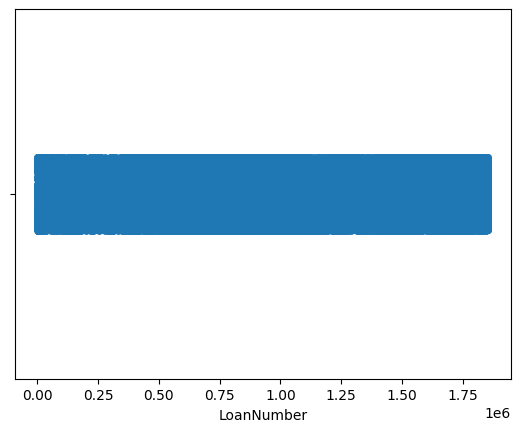

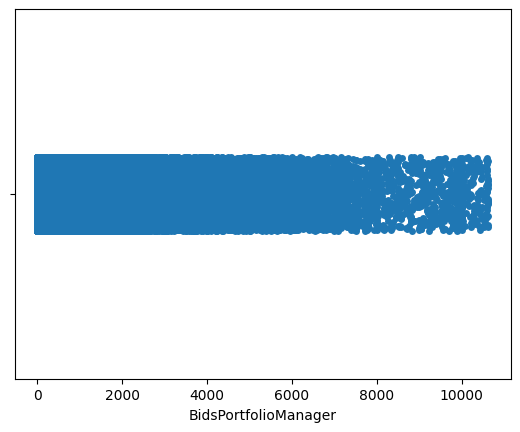

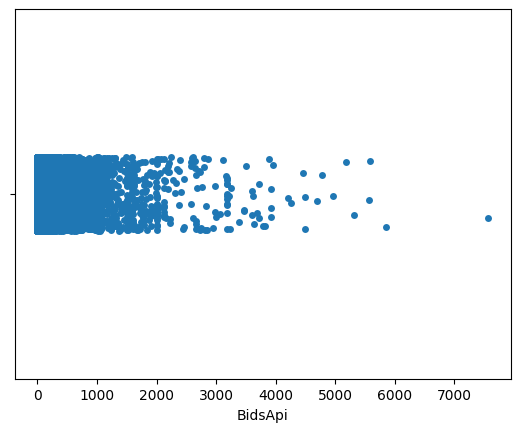

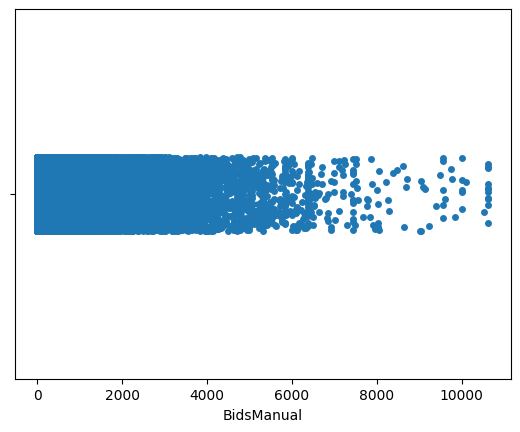

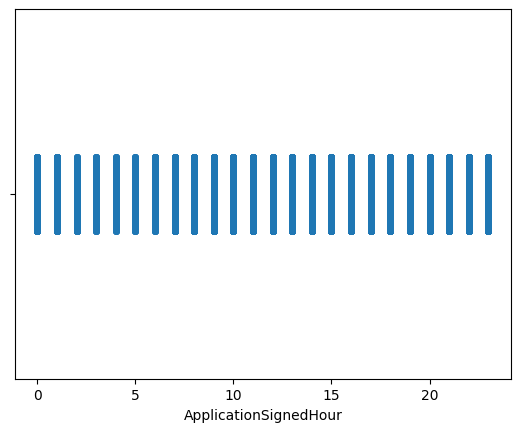

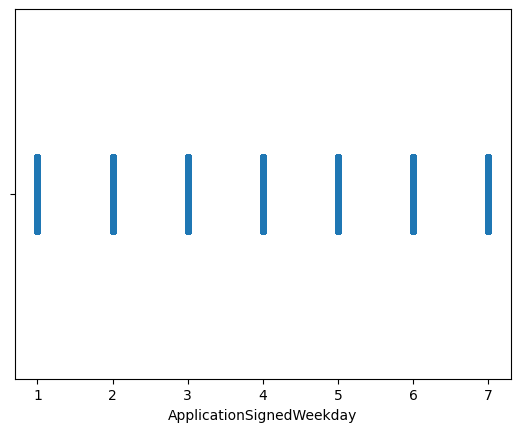

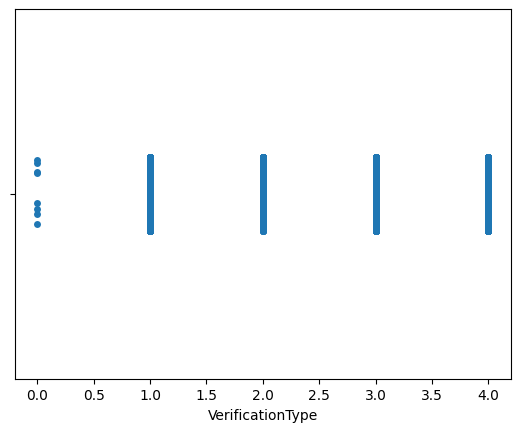

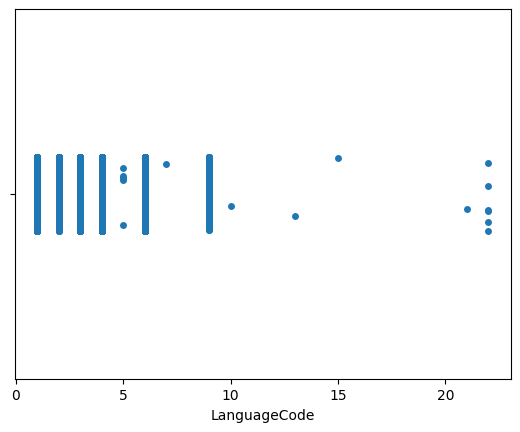

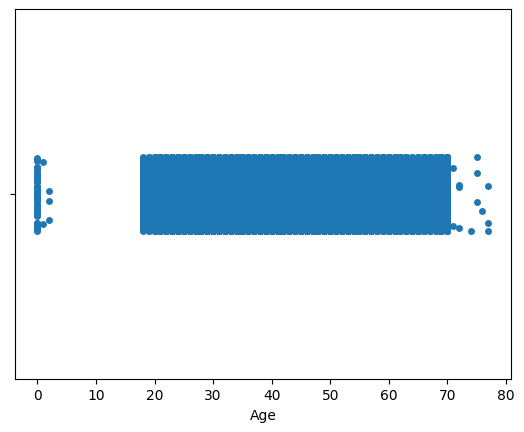

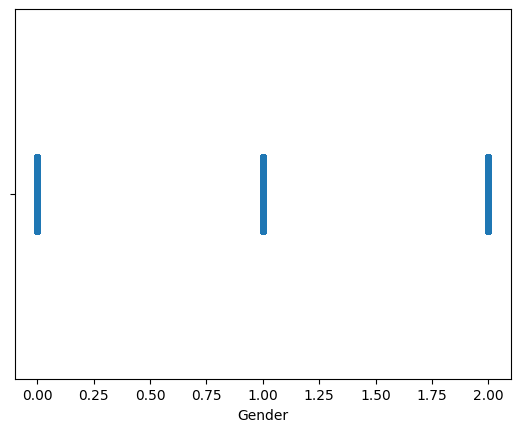

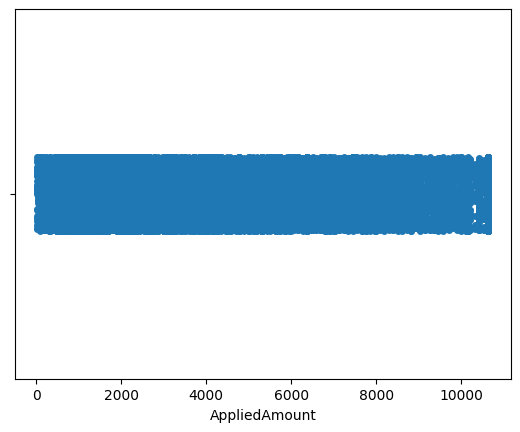

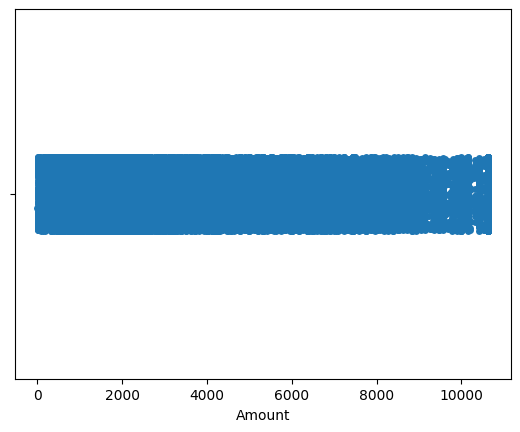

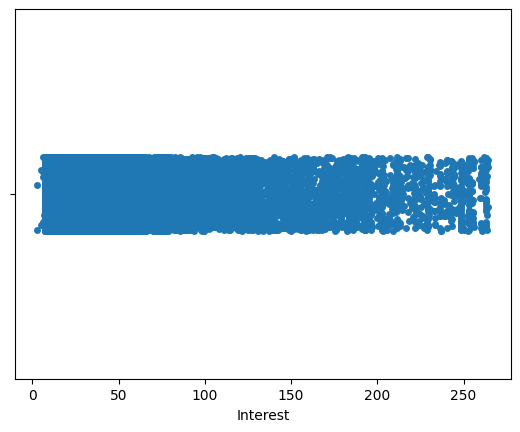

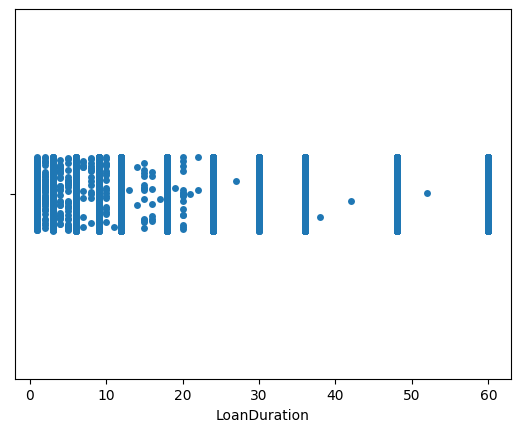

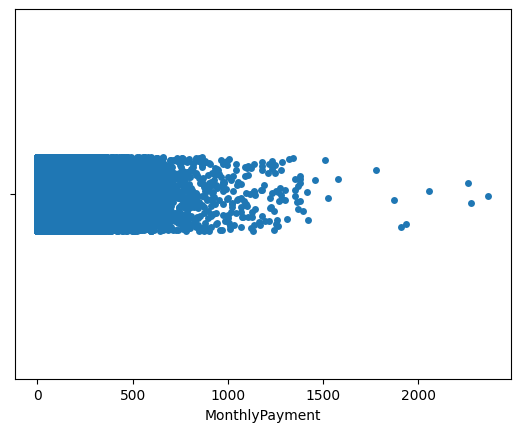

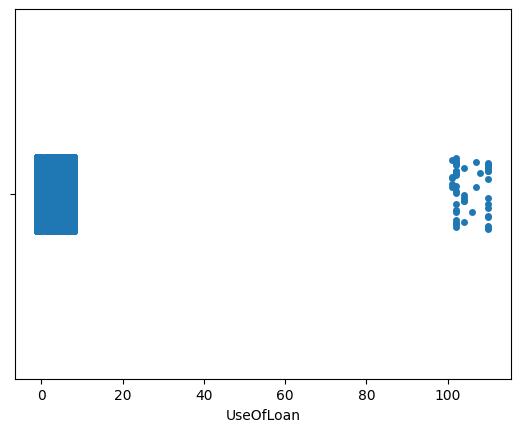

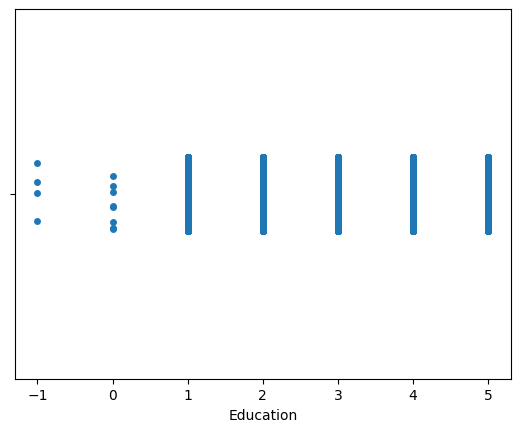

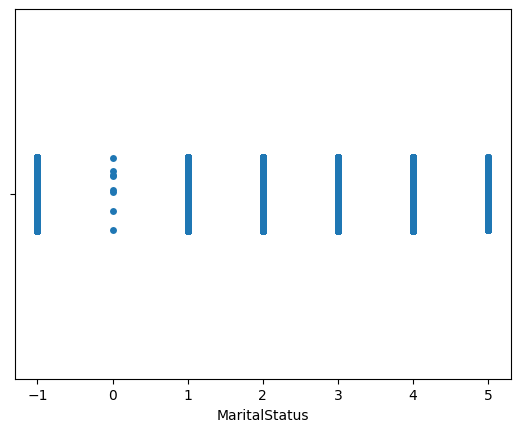

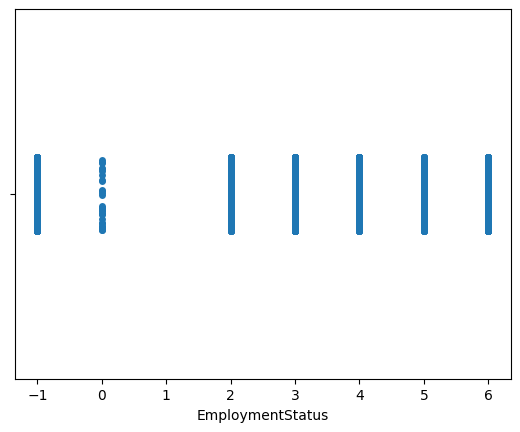

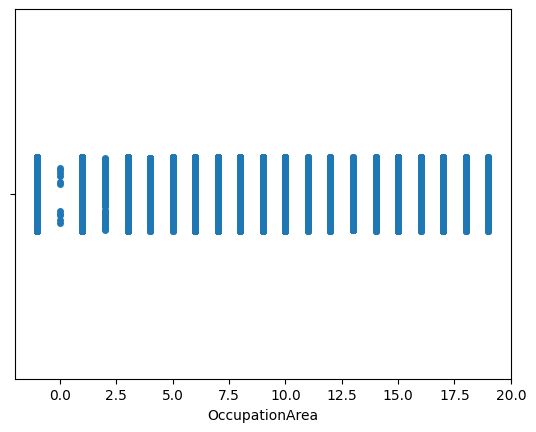

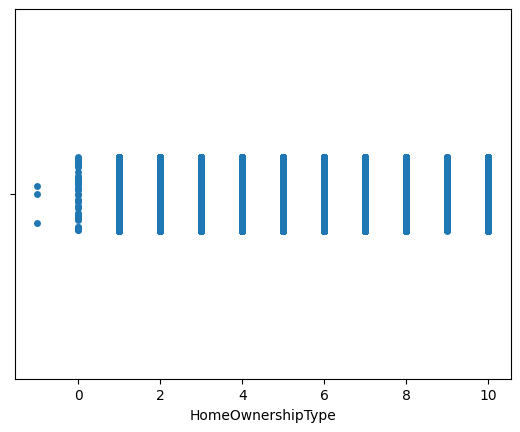

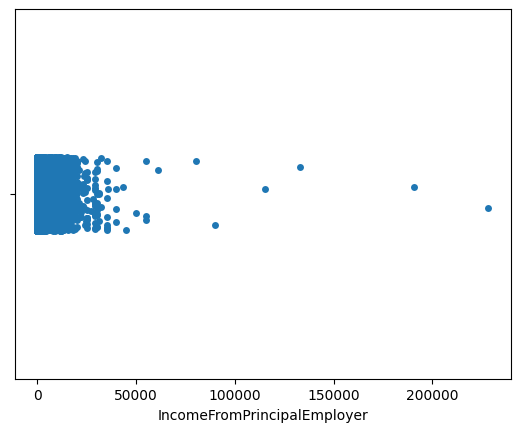

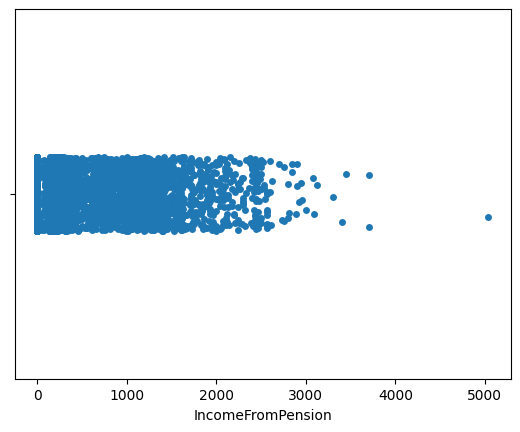

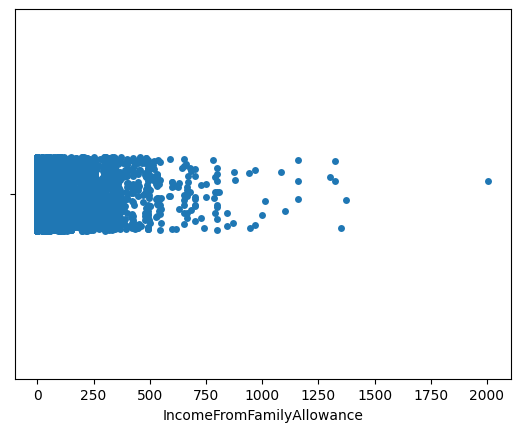

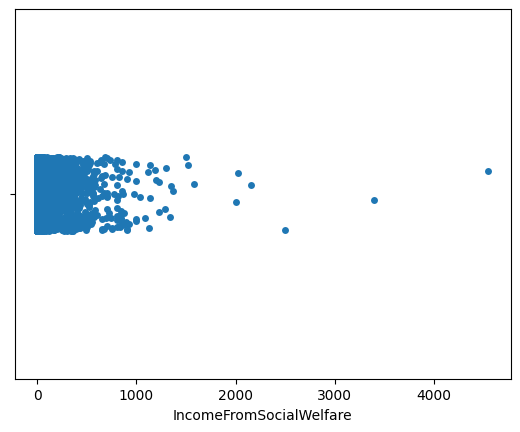

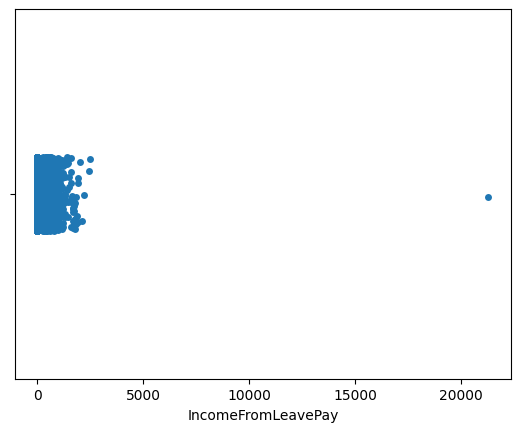

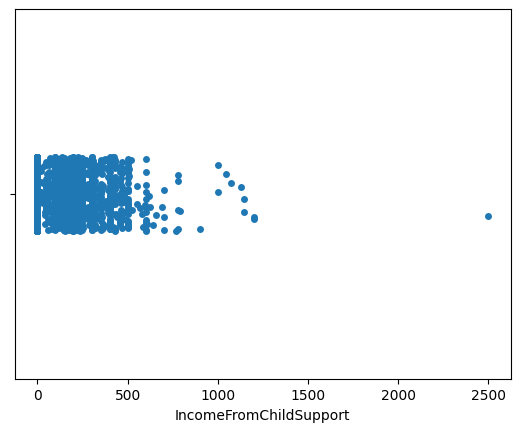

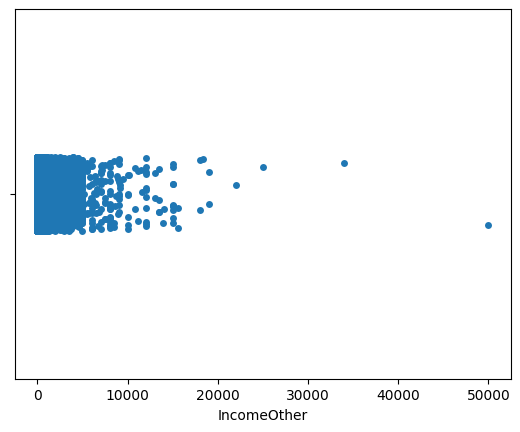

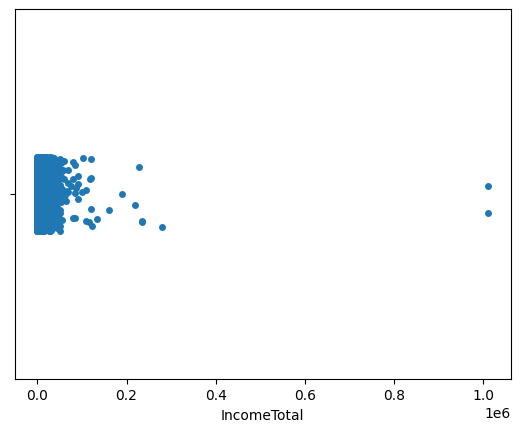

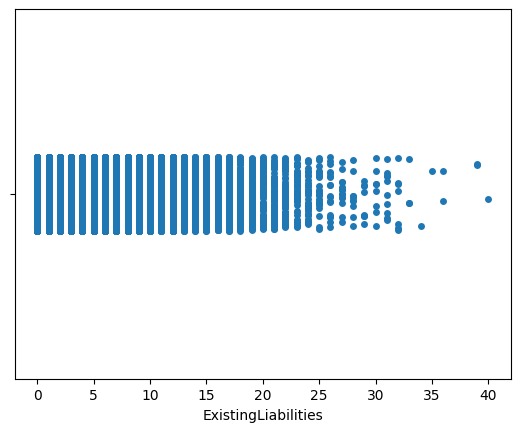

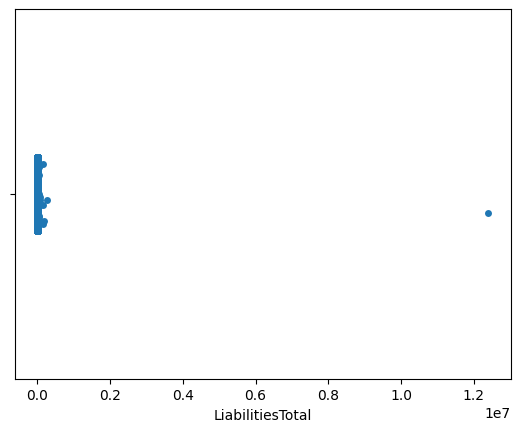

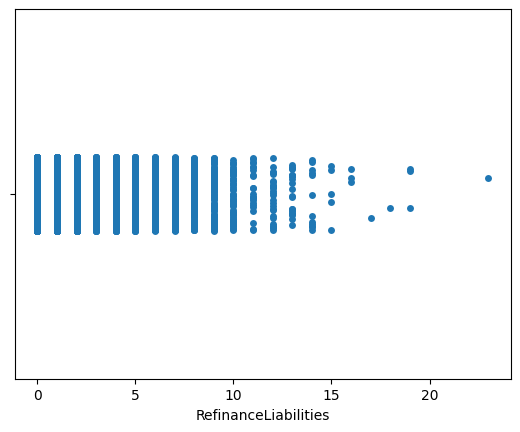

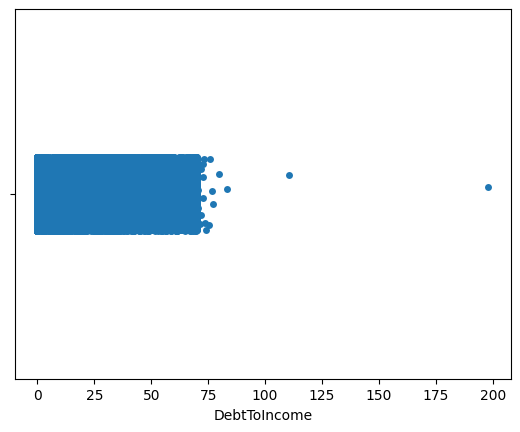

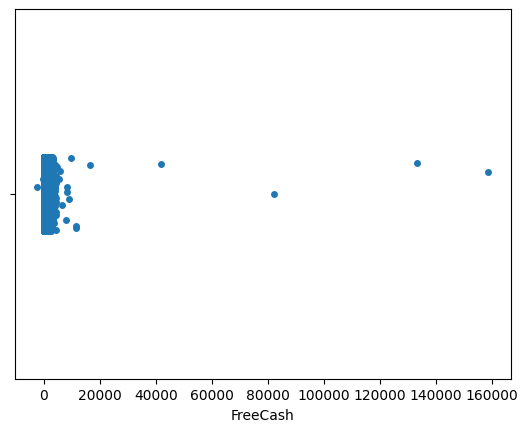

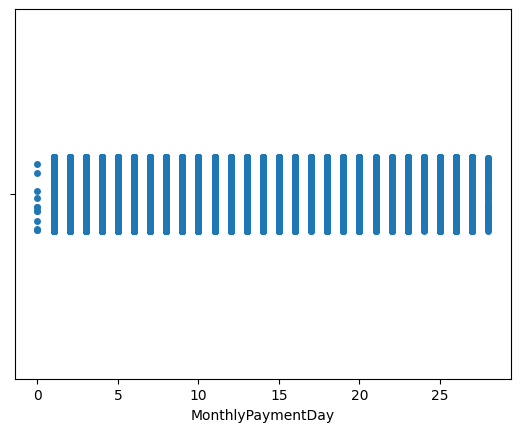

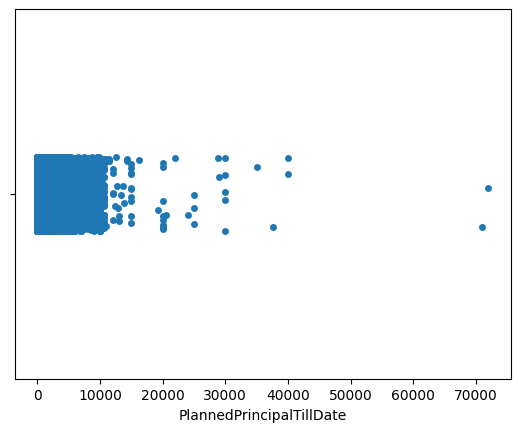

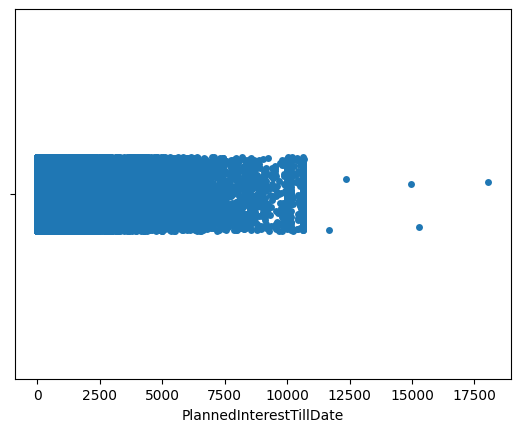

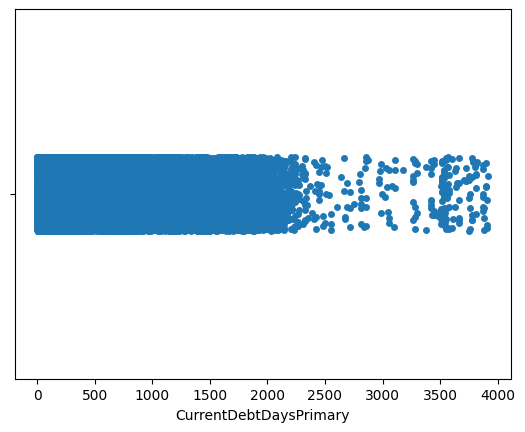

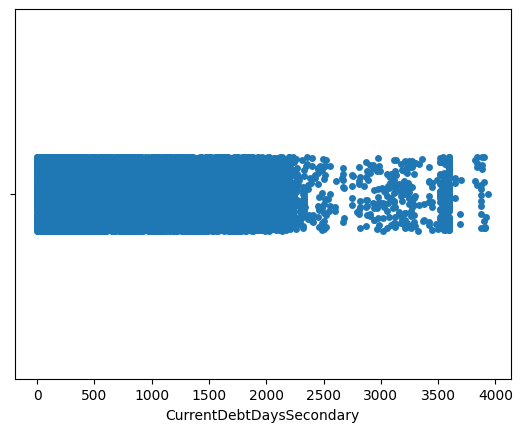

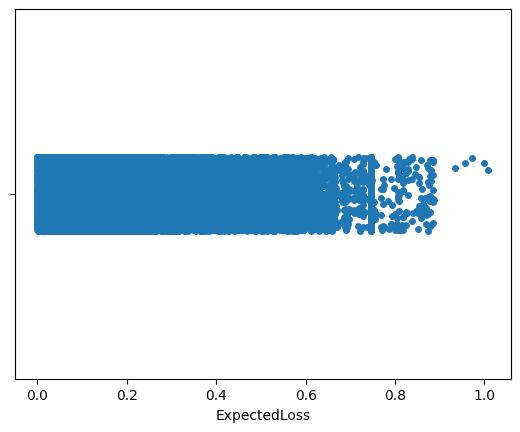

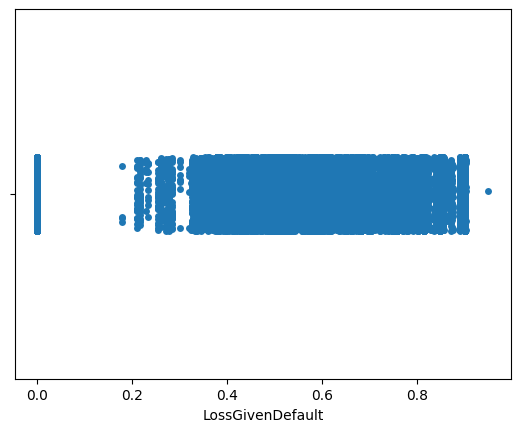

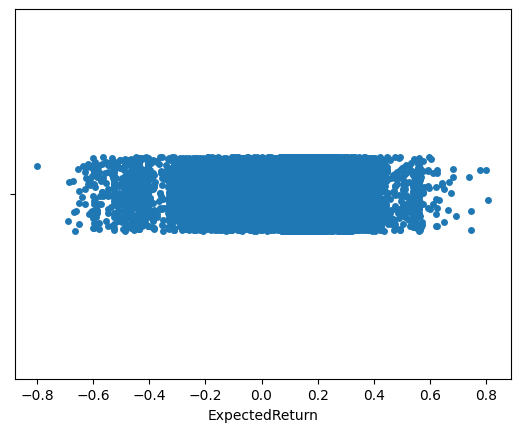

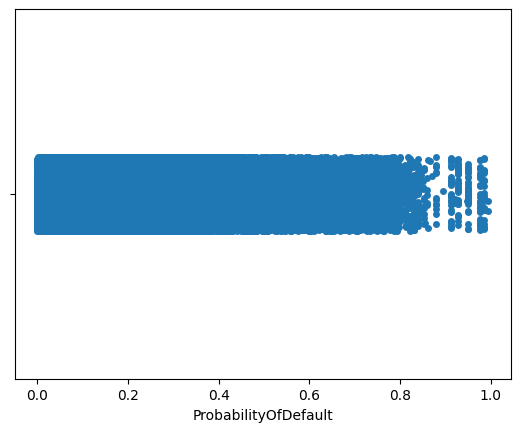

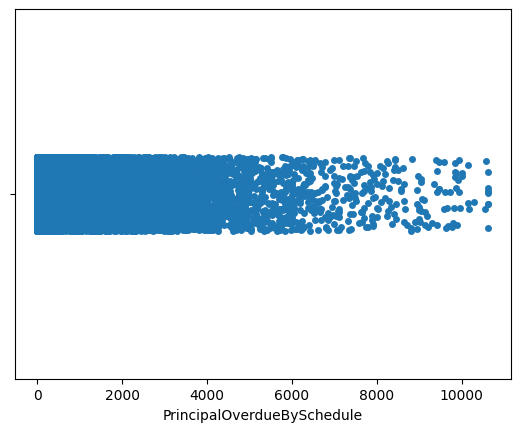

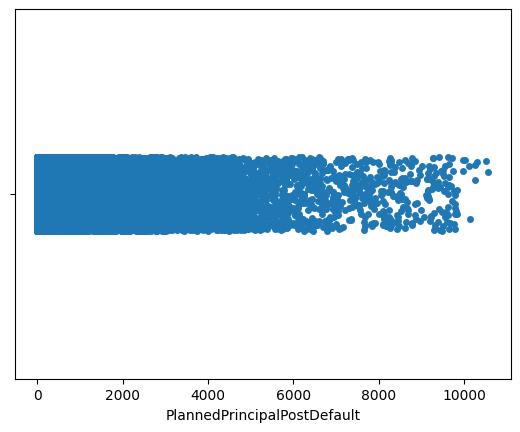

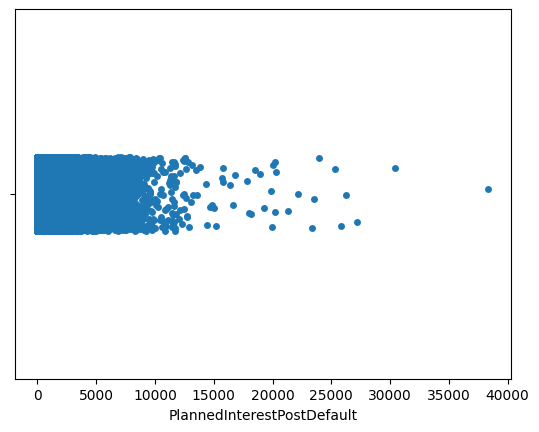

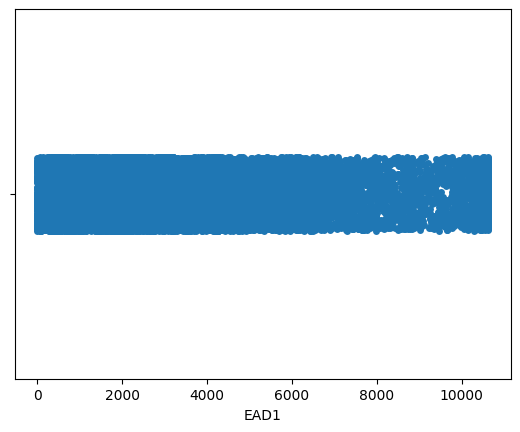

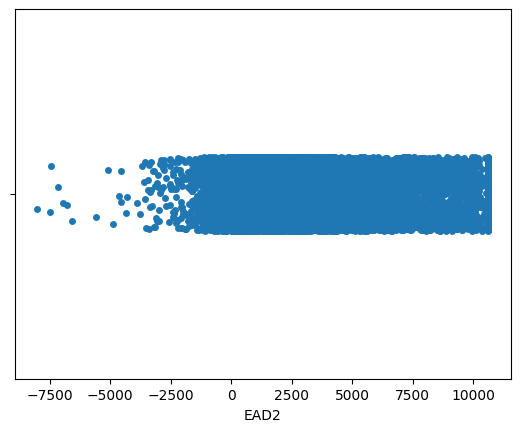

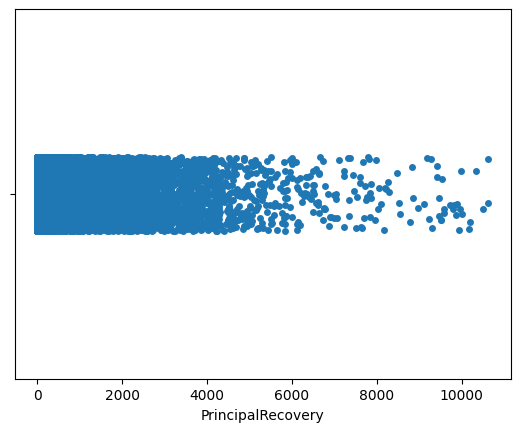

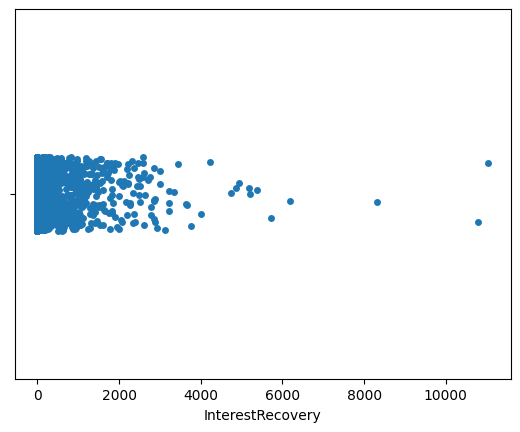

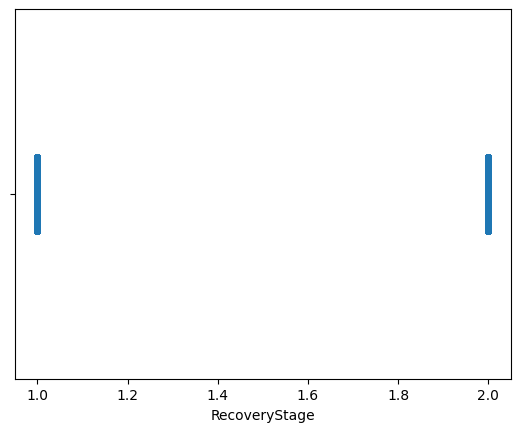

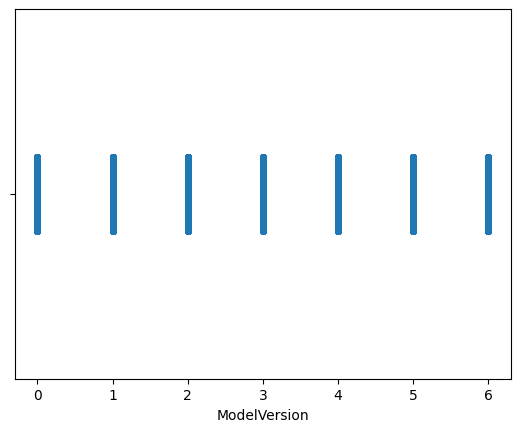

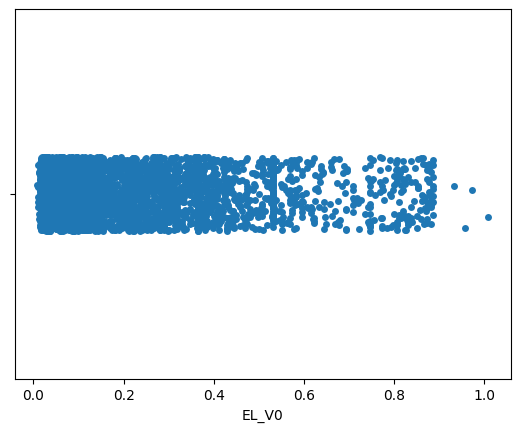

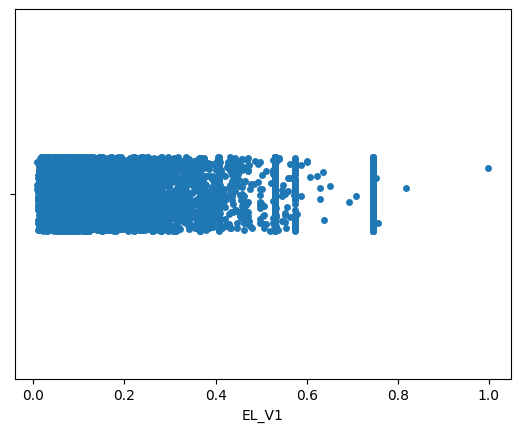

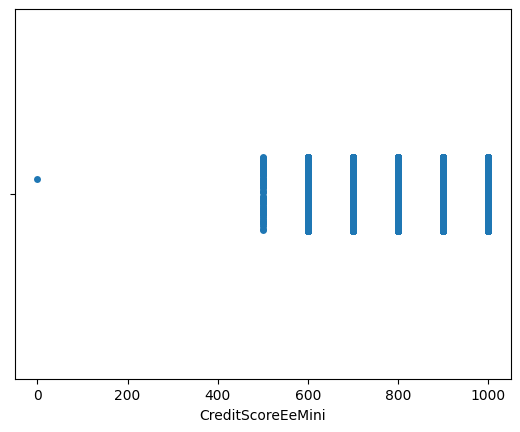

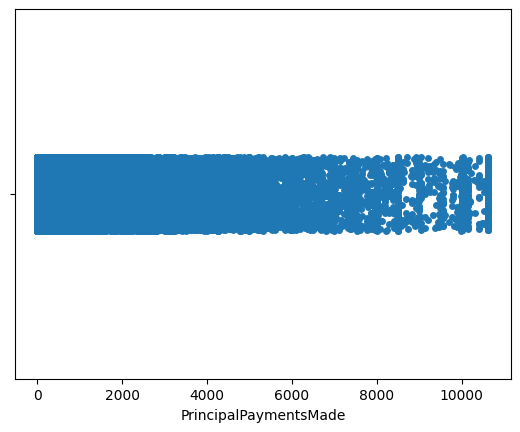

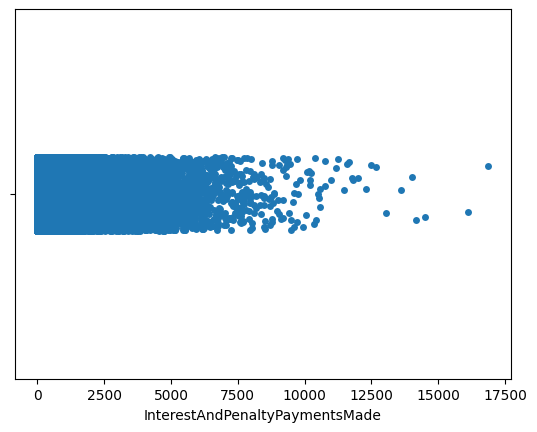

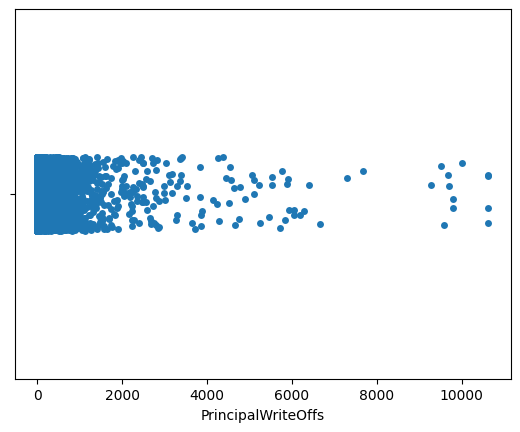

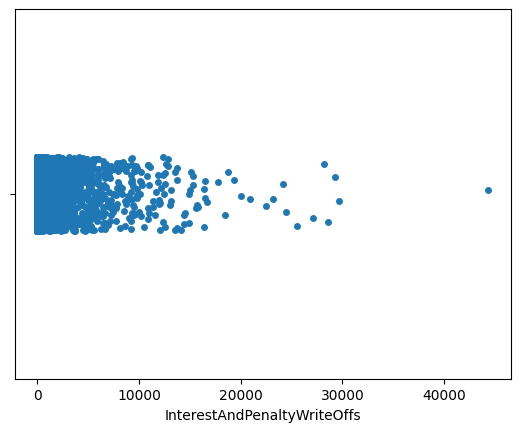

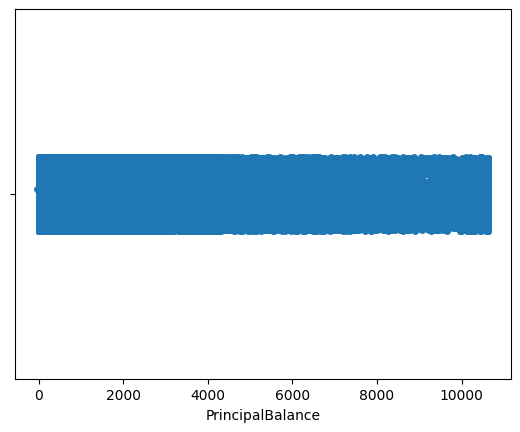

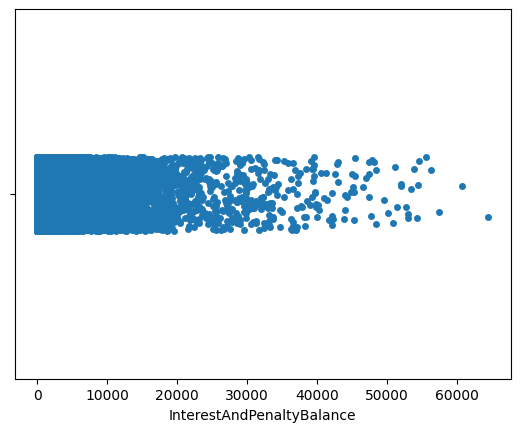

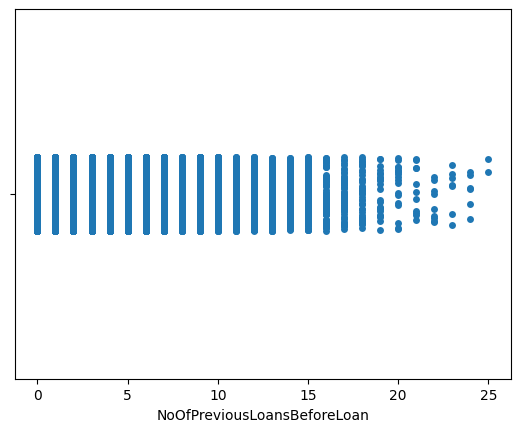

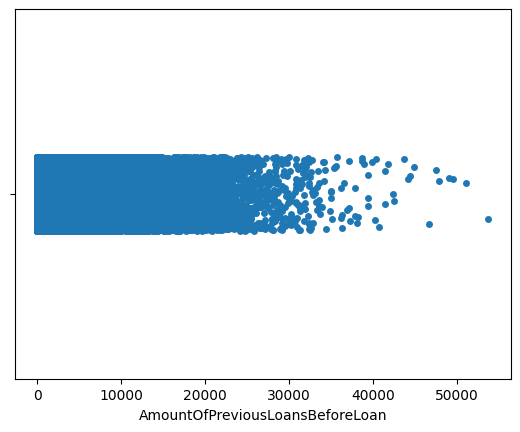

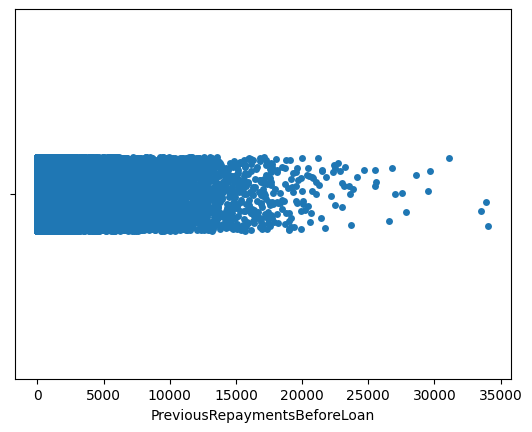

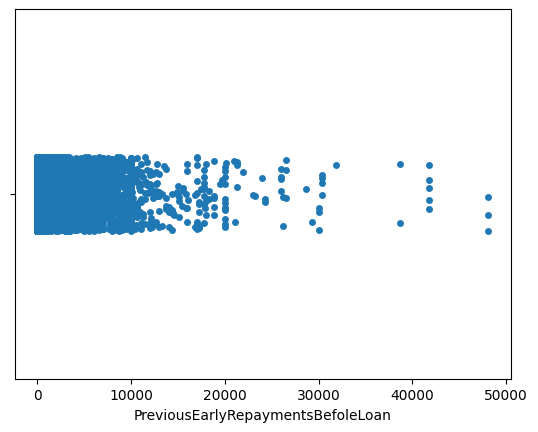

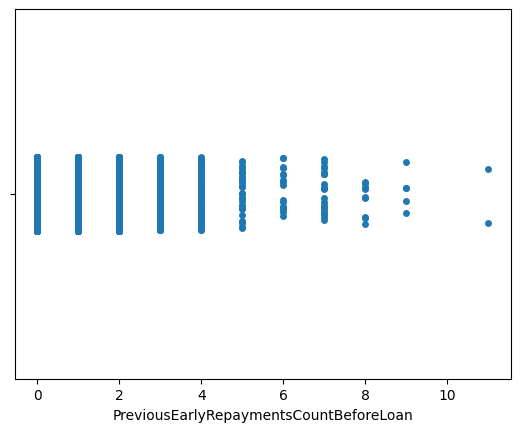

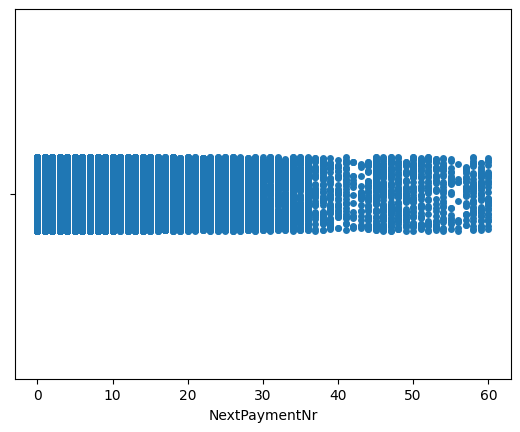

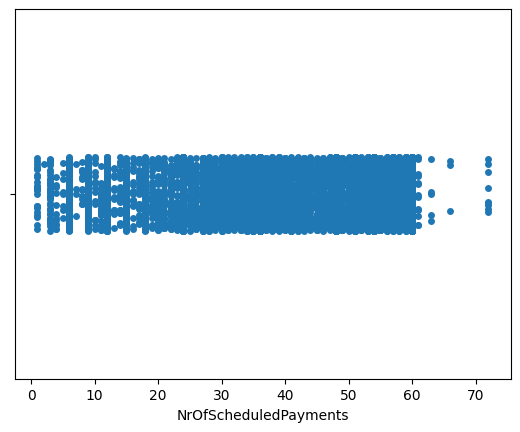

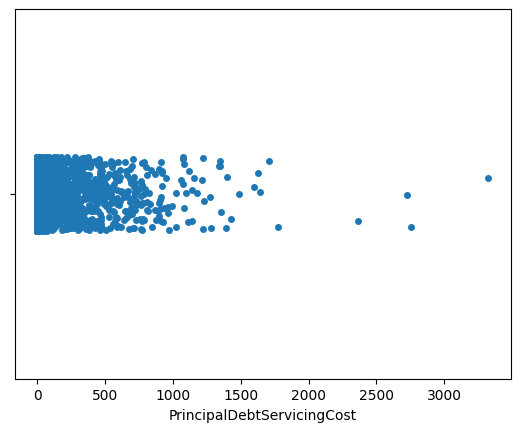

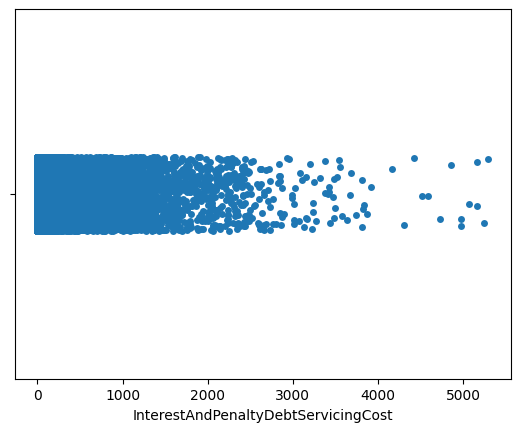

In [66]:
for col in p2p_lending_num.columns:
    sns.stripplot(data= p2p_lending_num, x=col)
    plt.show()

In [67]:
#Returns a list of index of outliers
def outliers(df,ft):
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [68]:
#Create an empty list to store the output indices from multiple columns
index_list=[]
for feature in p2p_lending_num.columns:
    index_list.extend(outliers(p2p_lending_num,feature))

In [69]:
index_list

[468,
 539,
 542,
 559,
 587,
 593,
 596,
 601,
 609,
 612,
 614,
 622,
 630,
 656,
 693,
 699,
 703,
 736,
 763,
 776,
 819,
 824,
 831,
 838,
 853,
 864,
 910,
 916,
 947,
 948,
 960,
 1000,
 1009,
 1184,
 1187,
 1233,
 1246,
 1248,
 1252,
 1256,
 1286,
 1298,
 1302,
 1310,
 1312,
 1318,
 1324,
 1331,
 1332,
 1333,
 1343,
 1357,
 1358,
 1362,
 1367,
 1368,
 1372,
 1373,
 1375,
 1383,
 1385,
 1397,
 1398,
 1399,
 1402,
 1430,
 1432,
 1433,
 1453,
 1463,
 1469,
 1478,
 1480,
 1482,
 1486,
 1487,
 1490,
 1496,
 1507,
 1509,
 1513,
 1518,
 1526,
 1534,
 1537,
 1542,
 1556,
 1557,
 1559,
 1567,
 1572,
 1577,
 1581,
 1582,
 1592,
 1602,
 1604,
 1608,
 1614,
 1617,
 1629,
 1657,
 1666,
 1679,
 1695,
 1701,
 1709,
 1721,
 1727,
 1742,
 1747,
 1754,
 1766,
 1777,
 1787,
 1802,
 1807,
 1817,
 1820,
 1824,
 1855,
 1875,
 1940,
 1950,
 1955,
 1959,
 1962,
 1966,
 1967,
 1971,
 1997,
 2006,
 2018,
 2028,
 2031,
 2033,
 2034,
 2038,
 2103,
 2104,
 2105,
 2106,
 2107,
 2127,
 2137,
 2157,
 2168,
 2

In [70]:
#Function which returns cleaned dataframe without outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [71]:
p2p_lending_num_cleaned = remove(p2p_lending_num,index_list)

In [72]:
p2p_lending_num.shape

(134529, 70)

In [73]:
p2p_lending_num_cleaned.shape

(27119, 70)

<AxesSubplot: xlabel='Age', ylabel='Count'>

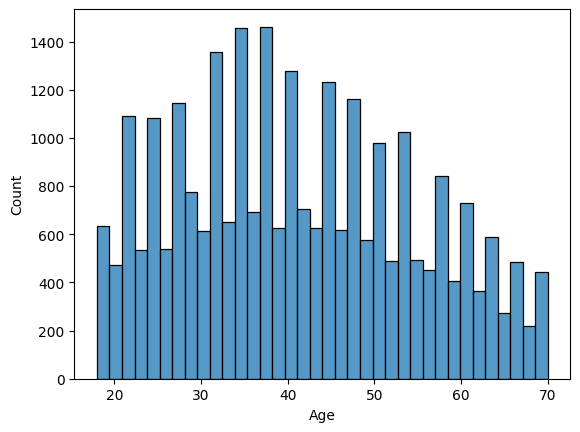

In [74]:
sns.histplot(p2p_lending_num_cleaned['Age'])

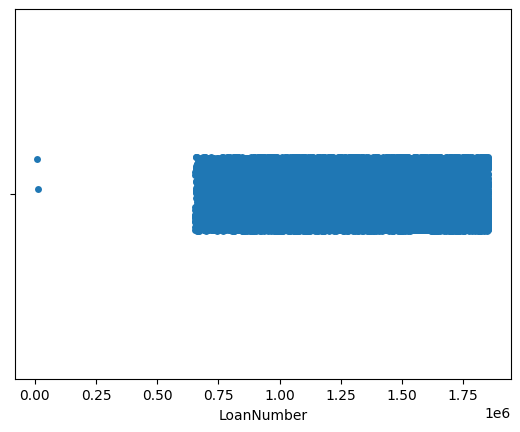

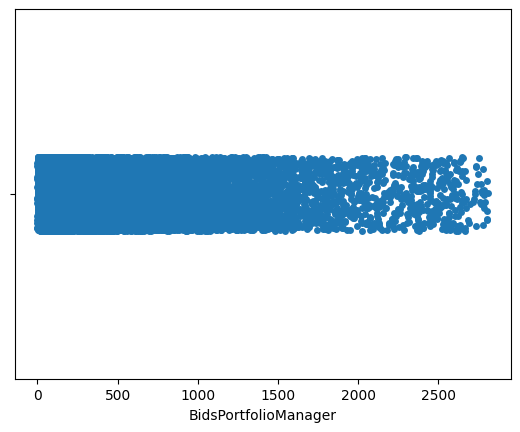

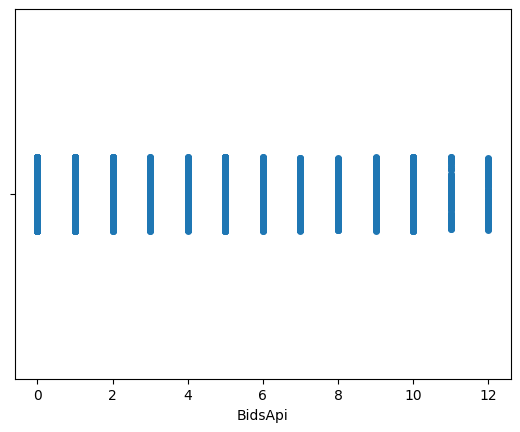

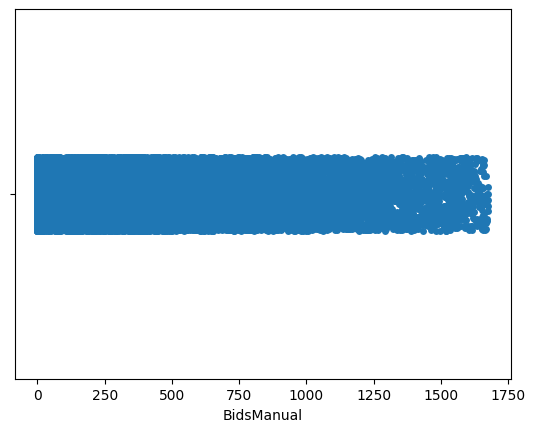

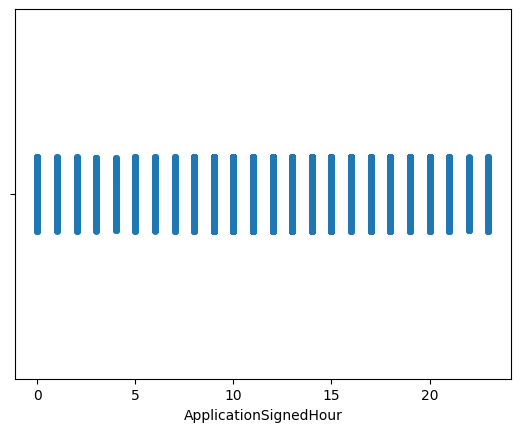

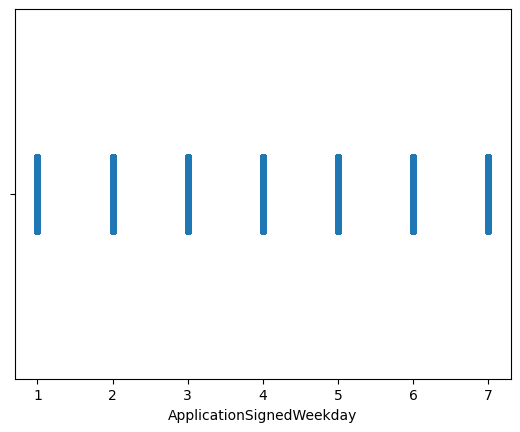

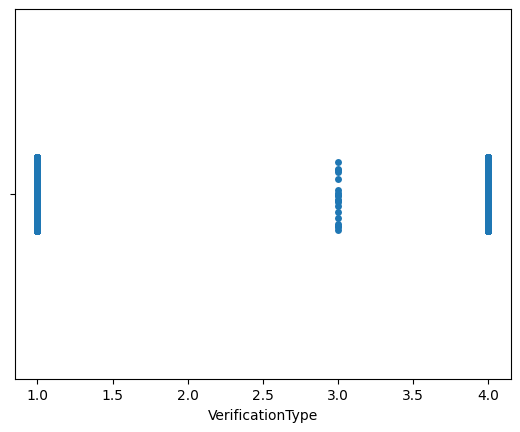

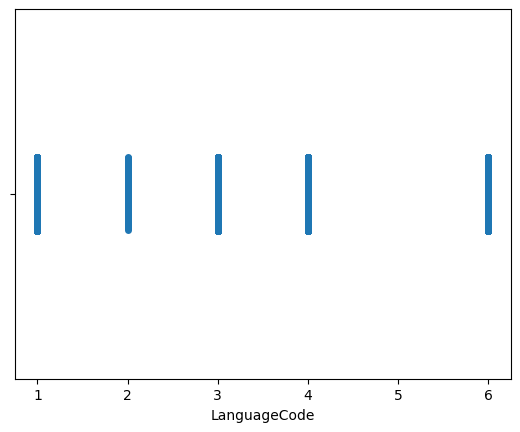

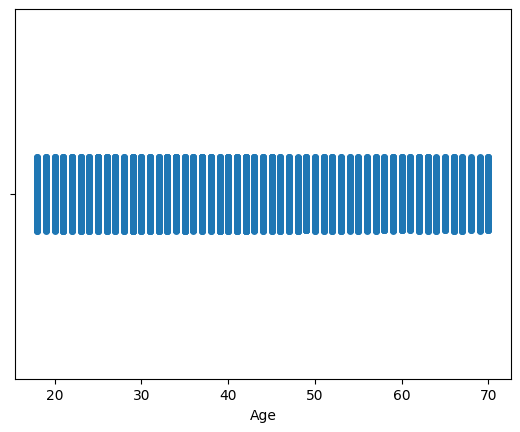

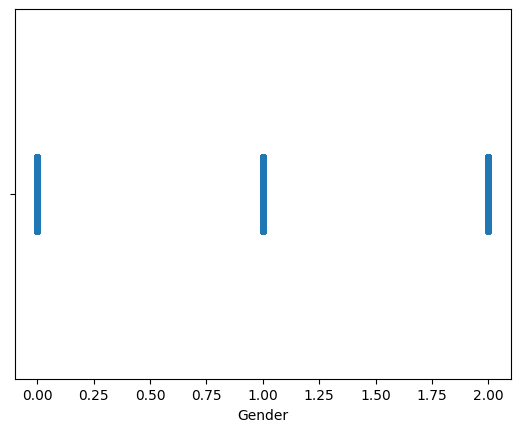

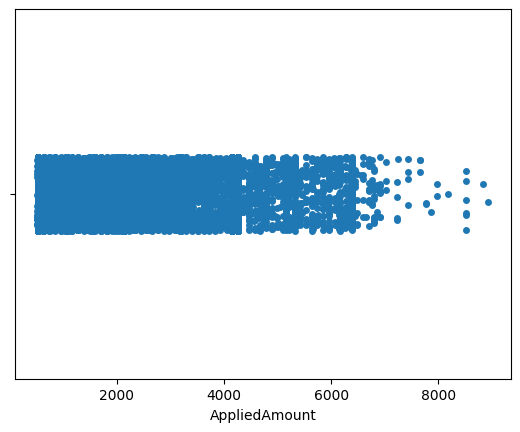

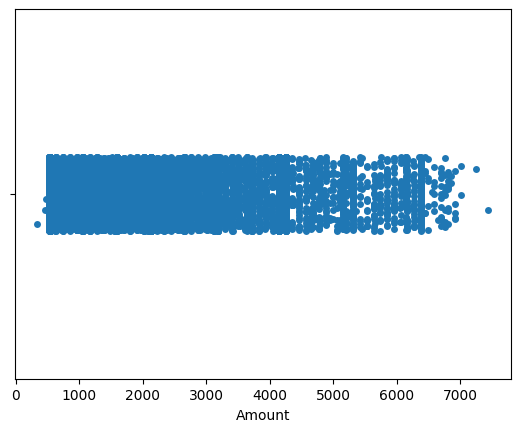

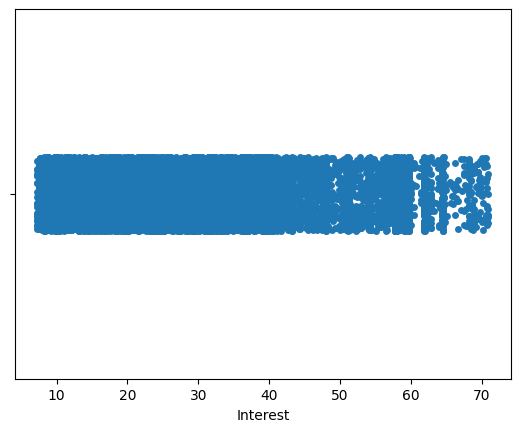

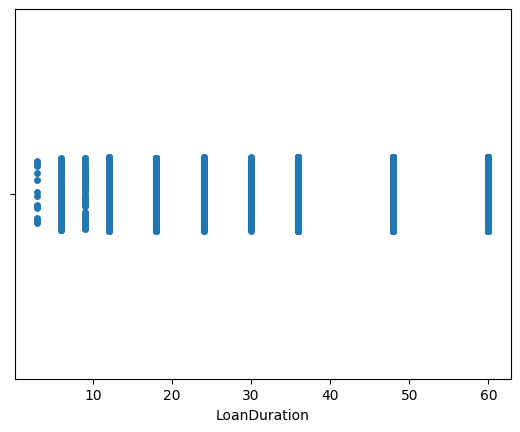

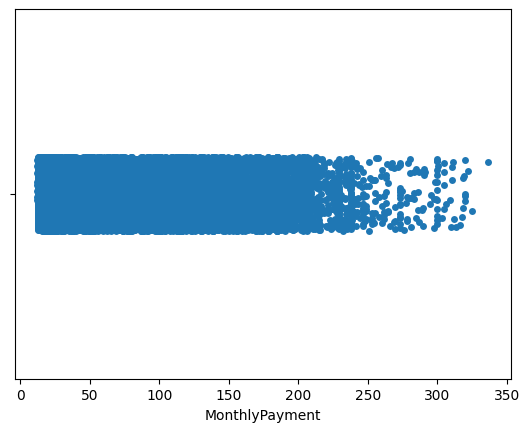

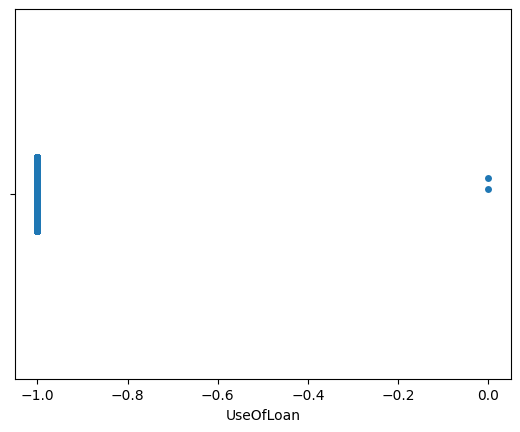

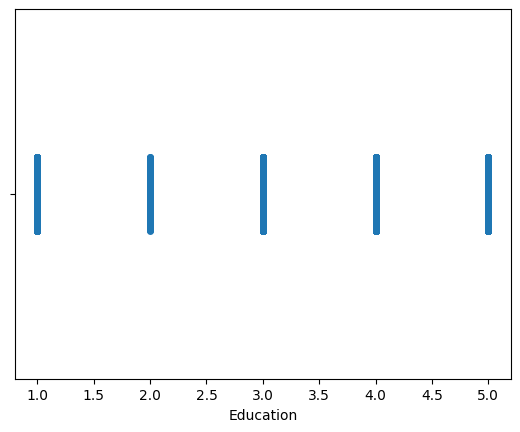

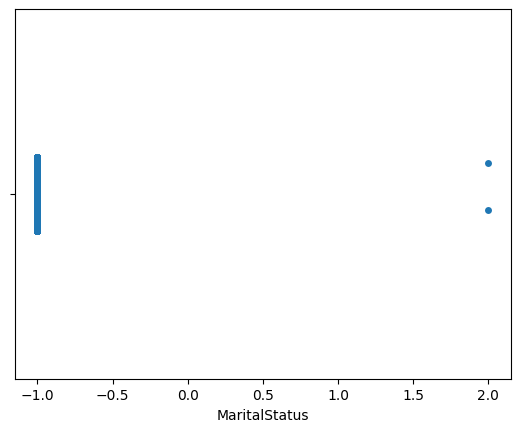

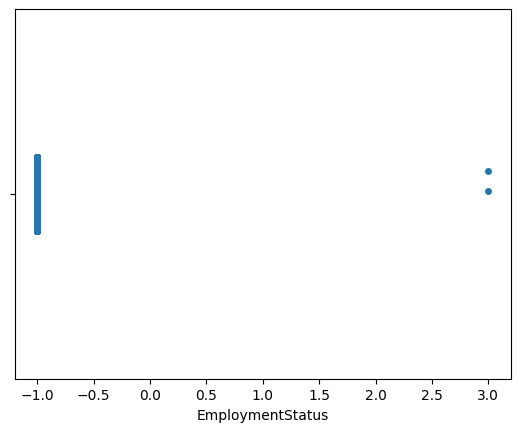

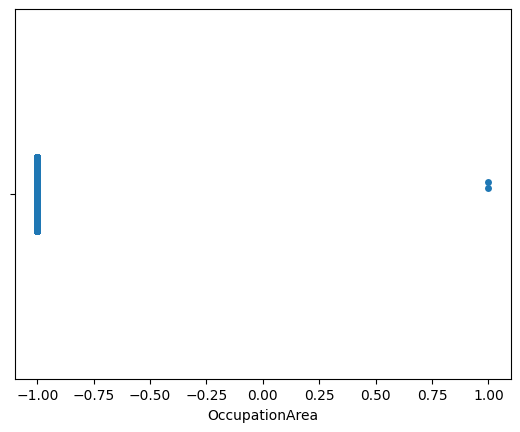

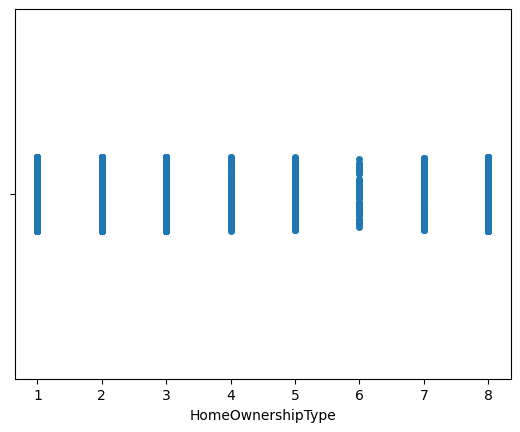

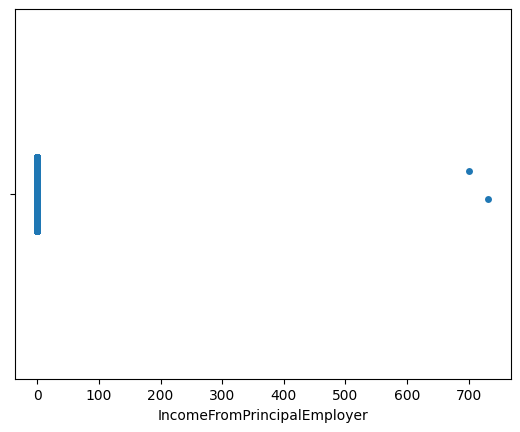

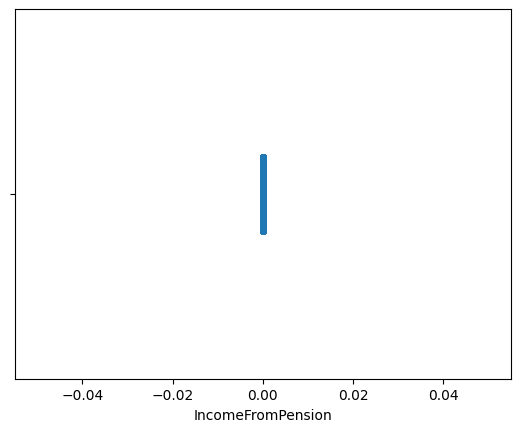

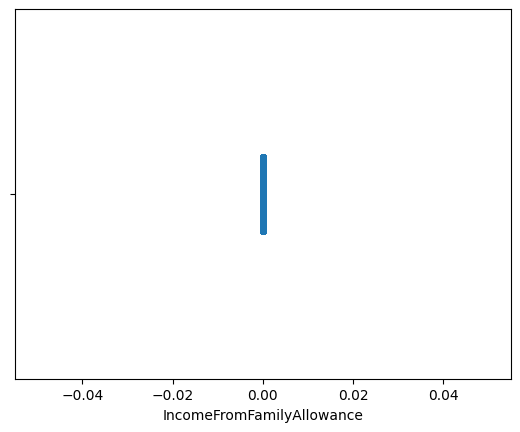

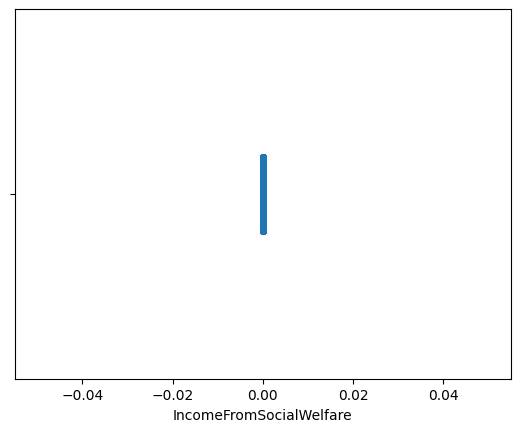

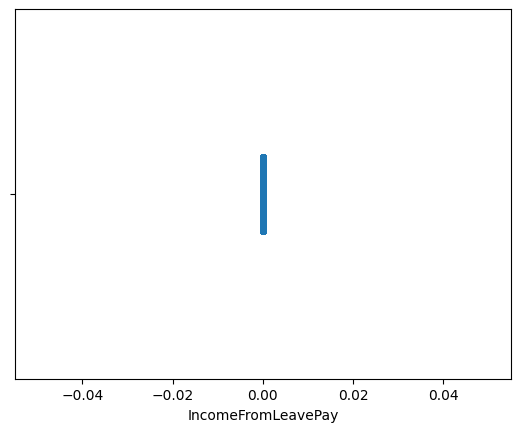

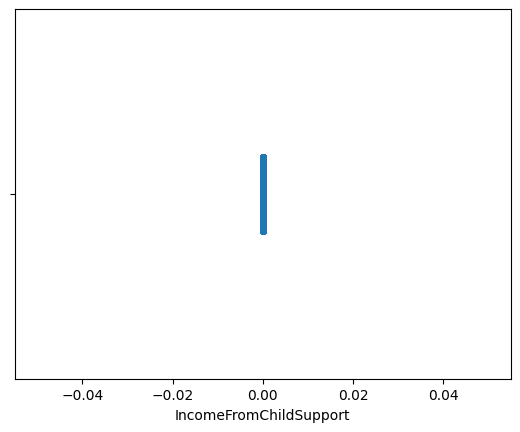

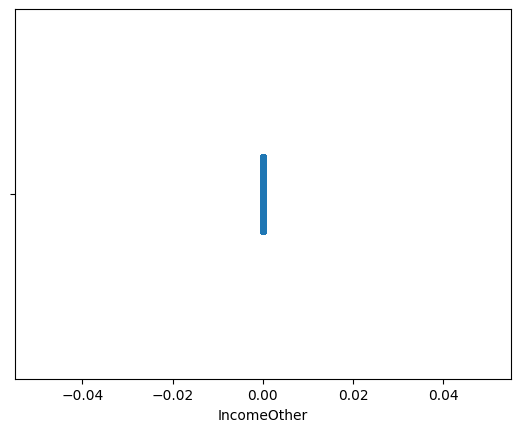

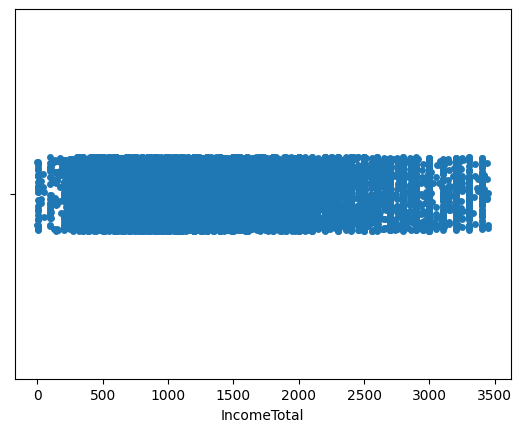

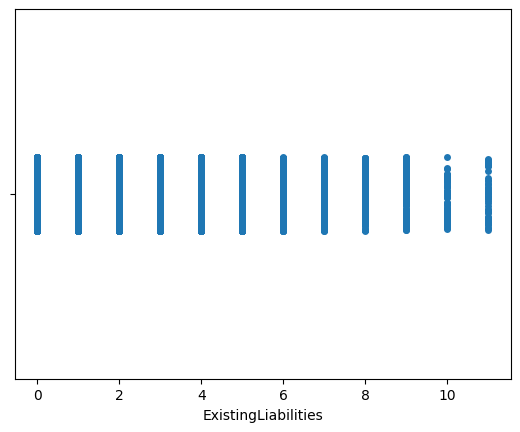

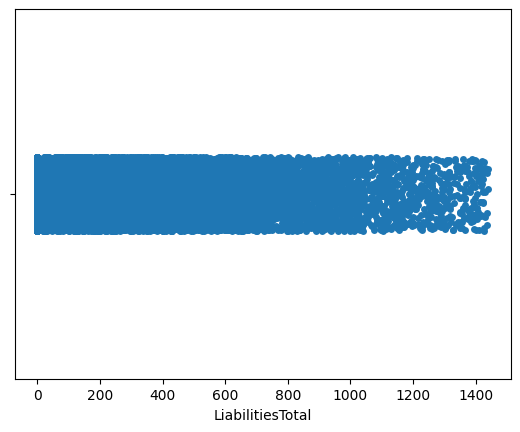

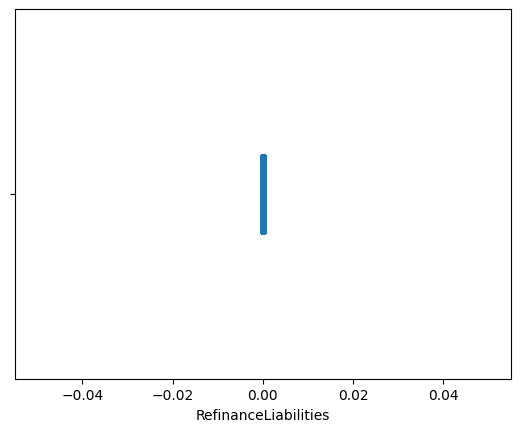

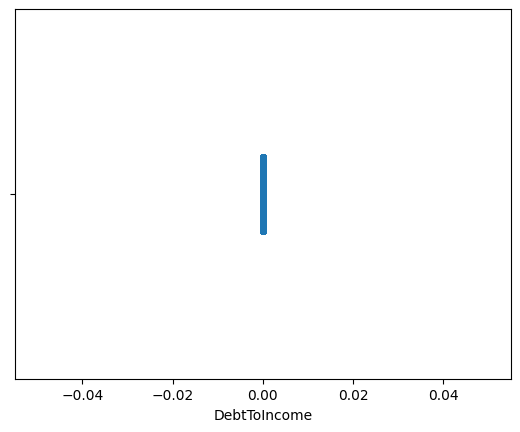

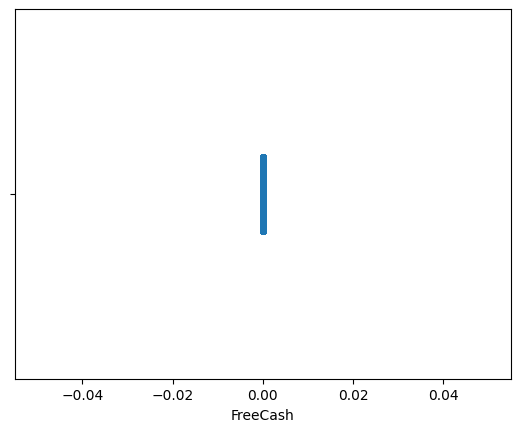

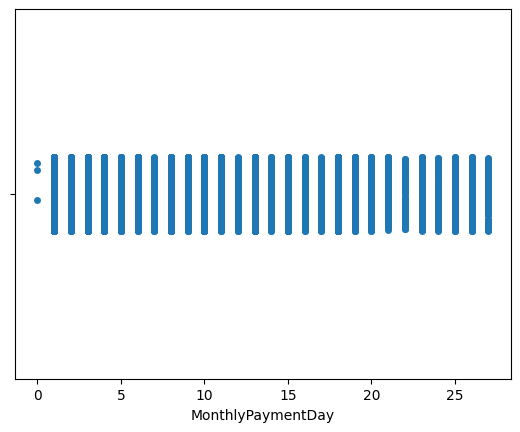

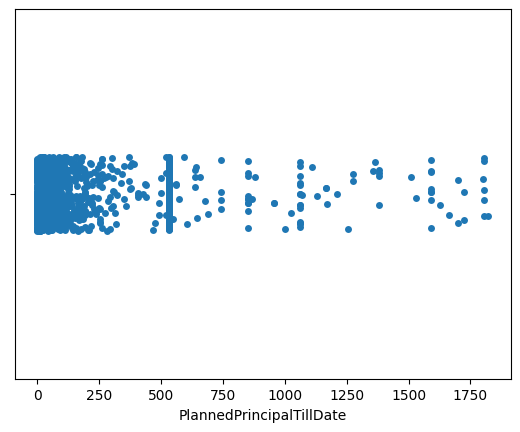

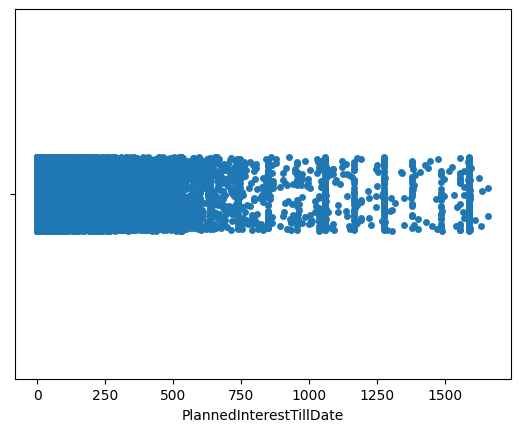

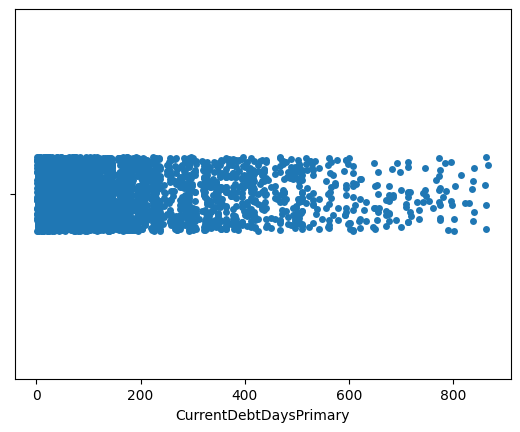

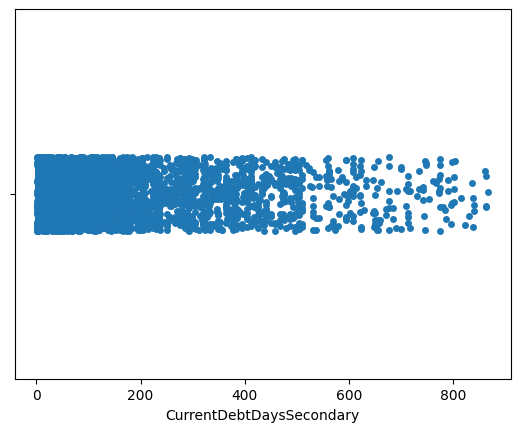

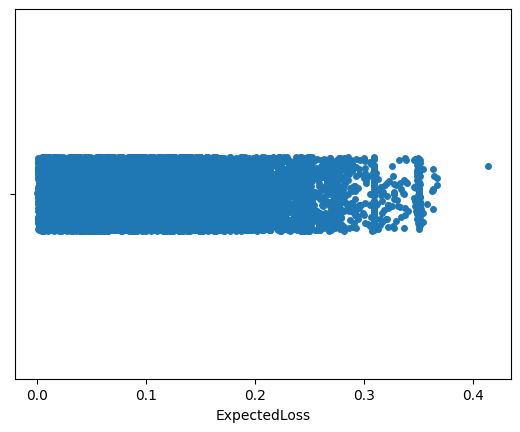

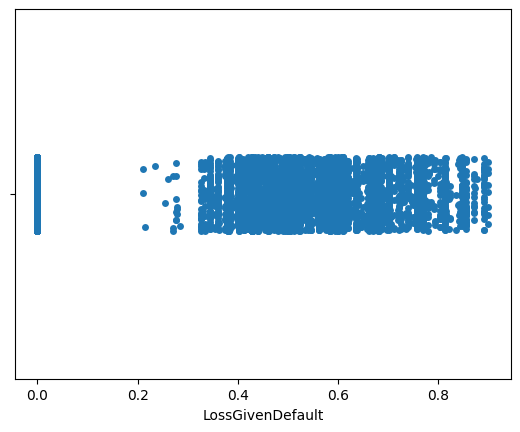

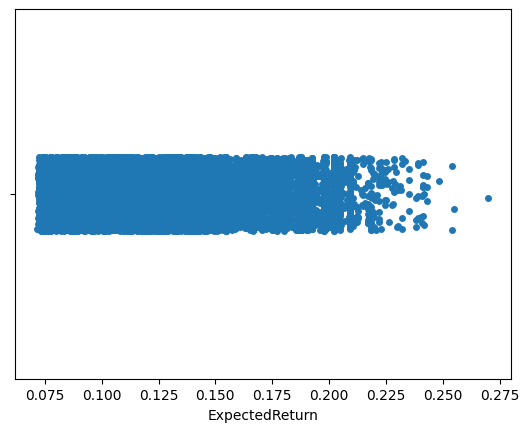

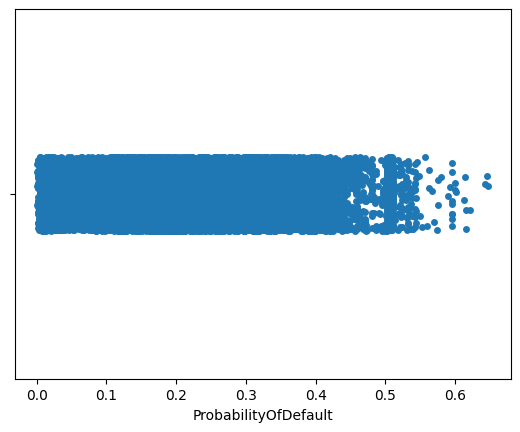

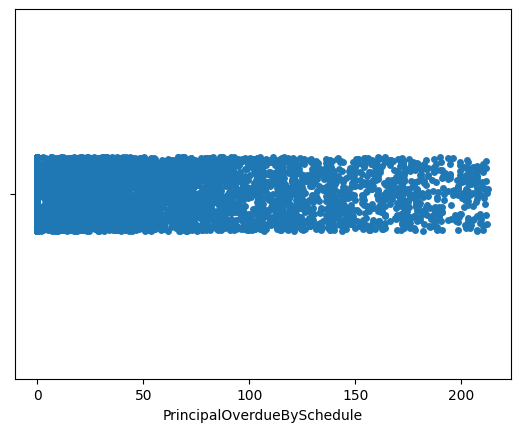

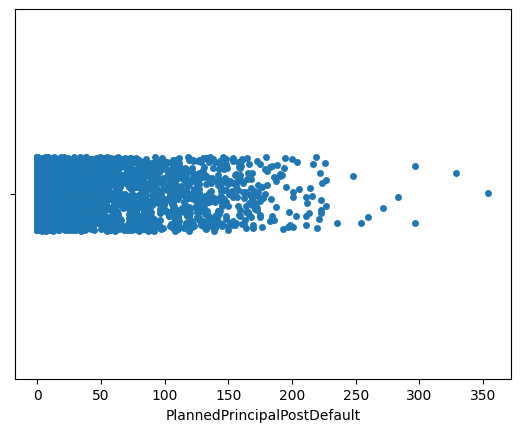

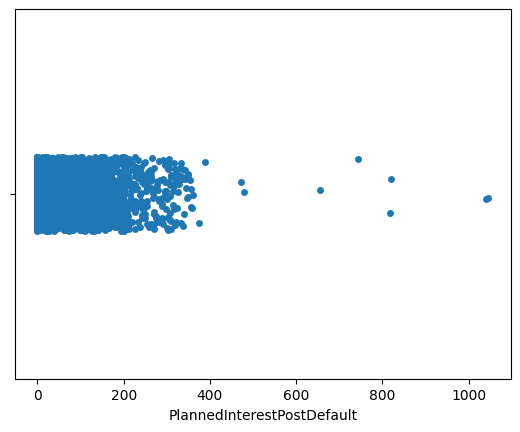

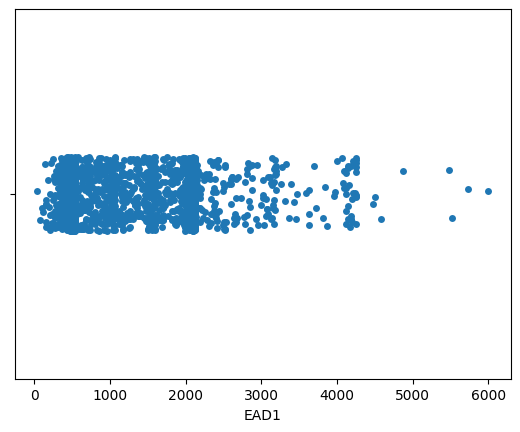

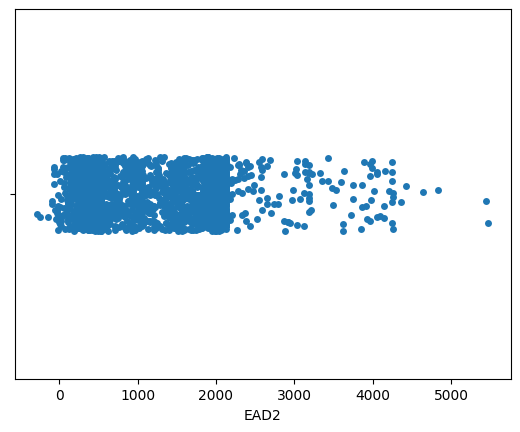

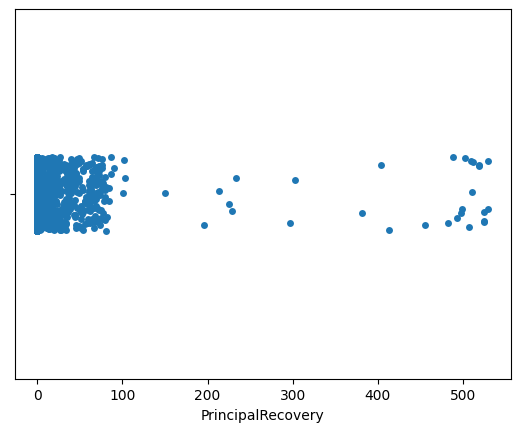

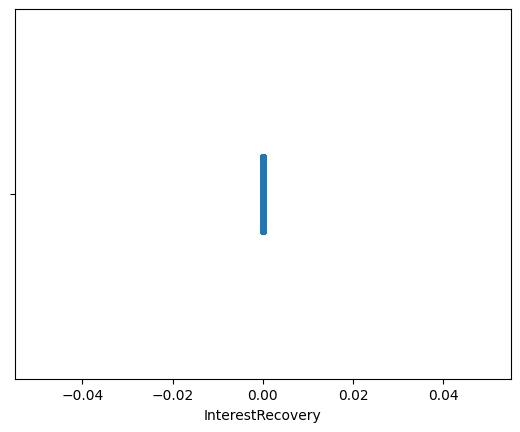

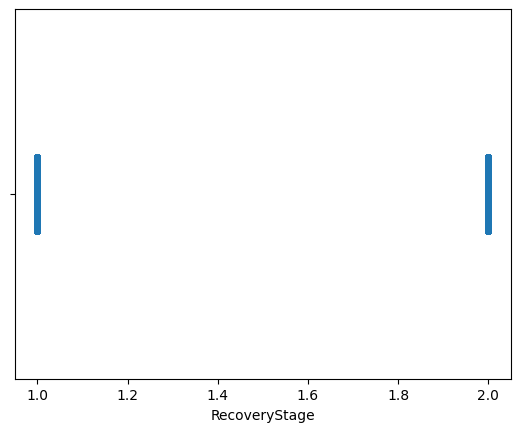

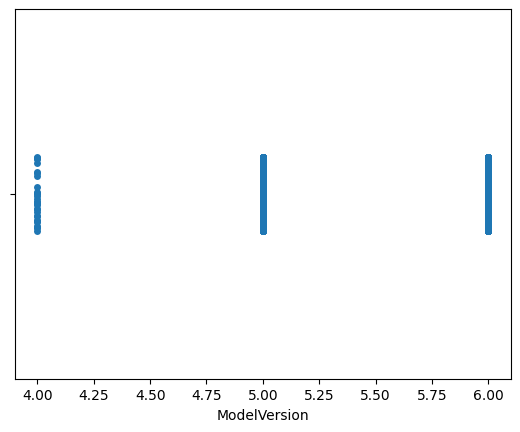

KeyError: 'x'

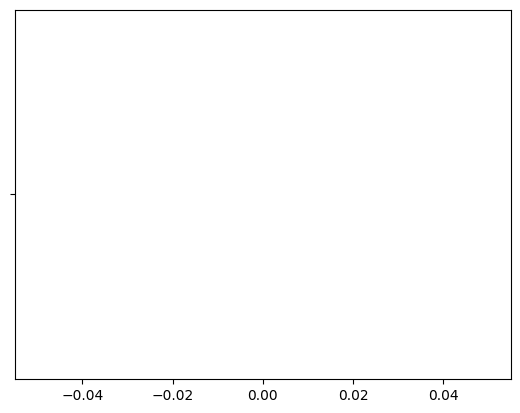

In [75]:
for col in p2p_lending_num.columns:
    sns.stripplot(data= p2p_lending_num_cleaned, x=col)
    plt.show()

In [76]:
p2p_lending_num_cleaned['Age'].value_counts()

29    777
34    768
37    738
38    724
42    705
36    694
32    690
35    687
41    667
31    665
33    652
44    644
43    628
39    625
46    619
30    613
40    612
28    609
45    587
47    587
48    576
49    575
22    565
25    553
26    540
27    536
23    534
24    529
21    527
53    521
50    514
54    505
55    492
52    489
20    474
51    465
56    453
58    426
57    414
59    407
60    385
62    365
19    346
61    344
63    311
18    287
64    278
65    272
69    252
66    248
67    237
68    218
70    190
Name: Age, dtype: int64

In [77]:
p2p_lending['Status'].value_counts()

Current    57121
Late       45700
Repaid     31580
Name: Status, dtype: int64

In [78]:
current_status=p2p_lending.query("Status == 'Current'")
current_status

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
491,2020-01-27,0D5669F1-7D09-426F-8AAD-A414008672A6,283758,2015-01-05 12:48:26,2015-01-05 12:48:26,1355,0,645.0,BO723619A,True,2015-01-02 08:08:53,2015-01-06,NaN,2015-02-16,2020-01-15,2021-01-15,12,2,3.0,4,28,1986-02-04,0.0,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,7,5.0,2.0,1,3.0,UpTo2Years,Worker,2To5Years,6.0,1.0,2097.0,0.0,0.0,0.0,0.0,0.0,0.0,2097.0,1,629.00,0,3.05,1404.10,15,True,320.34,1064.06,2020-01-17,NaN,NaN,NaN,NaN,0.101782,0.90,0.142818,0.086993,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-16 03:09:15.093000000,1.0,D,NaN,NaN,0.101782,D,HR,Current,True,NaN,31-60,NaN,NaN,RL2,NaN,1387.57,1845.64,0.0,0.0,612.43,0.0,0,0.0,0.00,0.0,0,2016-06-15,2017-06-15,2020-02-17,45.0,56.0,2016-06-13,0.0,0.00,NaN
523,2020-01-27,32686D51-8803-4718-8DB9-A4190090D90C,286381,2015-01-07 10:22:12,2015-01-07 10:22:12,1000,0,0.0,BO525957,False,2015-01-07 08:46:29,2015-01-07,2021-11-08,2015-03-06,2020-02-06,2021-11-08,10,4,4.0,1,27,1987-04-22,0.0,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,7,4.0,3.0,0,3.0,UpTo1Year,SpecialistOfficeWorker,5To10Years,1.0,6.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,560.0,8,1327.37,2,47.56,43.67,6,True,99.52,72.77,2020-01-08,NaN,NaN,NaN,NaN,0.035653,0.65,0.141778,0.042193,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,NaN,NaN,0.035653,B,C,Current,True,NaN,31-60,NaN,NaN,NaN,1000.0,608.05,638.67,0.0,0.0,391.95,0.0,1,1300.0,187.87,0.0,0,2019-06-10,2019-09-09,2020-02-10,9.0,30.0,2019-06-09,0.0,4.86,NaN
536,2020-01-27,EBC10795-4808-45E4-9144-A41900D1CD79,286544,2015-01-07 13:28:42,2015-01-07 13:28:42,2345,0,655.0,BO6A2641,False,2015-01-07 12:43:52,2015-01-07,2024-02-23,2015-02-16,2020-01-14,2024-02-23,13,4,3.0,1,29,1985-12-18,0.0,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,7,2.0,3.0,0,3.0,UpTo3Years,SuperiorSpecialist,2To5Years,3.0,3.0,745.0,0.0,0.0,0.0,0.0,0.0,0.0,745.0,4,427.03,0,27.48,290.28,14,True,0.00,278.21,2020-01-23,NaN,NaN,NaN,NaN,0.036668,0.65,0.142020,0.043394,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,NaN,NaN,0.036668,B,E,Current,True,NaN,NaN,NaN,NaN

In [79]:
target=current_status['DefaultDate'].notnull().astype('int')

In [80]:
target.value_counts()

0    57000
1      121
Name: DefaultDate, dtype: int64

In [81]:
p2p_lending=p2p_lending.drop(columns =['Status','DefaultDate'])

In [82]:
p2p_lending['target']=target

In [83]:
p2p_lending.fillna('MISSING',inplace=True)

In [84]:
target.value_counts()

0    57000
1      121
Name: DefaultDate, dtype: int64

In [85]:
p2p_lending=p2p_lending.drop(columns =['ReportAsOfEOD','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','DateOfBirth','LastPaymentOn','ListedOnUTC','BiddingStartedOn','LoanApplicationStartedDate','StageActiveSince'])

In [86]:
p2p_lending=p2p_lending.drop(columns =['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'])

In [87]:
p2p_lending.to_csv('Bondora_raw_preprocessed_last.csv',index=False)

In [88]:
p2p_lending=pd.read_csv('Bondora_raw_preprocessed.csv',low_memory=False)

In [89]:
p2p_lending.head()

,LoanId,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Restructured,WorseLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,target
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,0,0,115.0410,KARU,True,17,5,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,319.0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,91-120,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NaN,NaN,NaN
1,978BB85B-1C69-4D51-8447-9C240104A3A2,654,0,0,140.6057,koort681,False,20,4,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,45.8300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NaN,NaN,NaN
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,0,0,319.5580,0ie,True,20,6,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,197.2926,NaN,NaN,NaN,NaN,116.35,NaN,NaN,True,180+,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,NaN,NaN,NaN
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,0,0,57.5205,Alyona,True,12,7,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11000.0,0.0,0.0,0.0,0.0,0.0,600.0,11600.0,0,0.0,0,0.0,0.0,15,True,293.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,31-60,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NaN,NaN,NaN
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,0,0,319.5582,Kai,True,10,4,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0.0,0.0,0.0,0.0,0.0,0.0,6800.0,0,0.0,0,0.0,0.0,25,True,833.8100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,180+,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,NaN,NaN,NaN


In [90]:
p2p_lending.shape

(134441, 65)

In [91]:
filtered_p2p_lending= p2p_lending.select_dtypes(include=['int64','float64'])
filtered_p2p_lending = filtered_p2p_lending.dropna(axis=0)

In [92]:
filtered_p2p_lending.head()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,Education,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,target
481,283758,1355,0,645.0,12,2,3.0,28,0.0,2000.0,2000.0,24.46,60,63.90,5.0,1.0,2097.0,0.0,0.0,0.0,0.0,0.0,0.0,2097.0,1,629.00,0,3.05,1404.10,15,1064.06,0.101782,0.90,0.142818,0.086993,0.0,1.0,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0,45.0,56.0,0.0
512,286381,1000,0,0.0,10,4,4.0,27,0.0,1000.0,1000.0,17.74,60,28.17,4.0,6.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,560.0,8,1327.37,2,47.56,43.67,6,72.77,0.035653,0.65,0.141778,0.042193,0.0,1.0,608.05,638.67,391.95,0.0,1,1300.0,187.87,0,9.0,30.0,0.0
525,286544,2345,0,655.0,13,4,3.0,29,0.0,3000.0,3000.0,17.87,60,84.72,2.0,3.0,745.0,0.0,0.0,0.0,0.0,0.0,0.0,745.0,4,427.03,0,27.48,290.28,14,278.21,0.036668,0.65,0.142020,0.043394,0.0,1.0,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0,12.0,60.0,0.0
530,284565,2045,0,955.0,14,2,3.0,25,0.0,3000.0,3000.0,27.98,60,102.12,3.0,4.0,1530.0,0.0,0.0,0.0,0.0,0.0,0.0,1530.0,4,955.00,0,36.41,472.88,27,1400.56,0.125474,0.90,0.154373,0.107243,0.0,1.0,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0,1.0,12.0,0.0
534,287138,1275,0,225.0,15,5,4.0,39,1.0,1500.0,1500.0,27.71,60,51.44,4.0,1.0,445.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,3,448.53,0,30.89,57.56,11,0.00,0.099172,0.65,0.177894,0.117363,0.0,1.0,840.19,1466.17,659.81,0.0,1,2000.0,1361.78,0,6.0,18.0,0.0


In [93]:
y = filtered_p2p_lending.target

In [94]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\Ziead\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [95]:
#p2p_lending_num2=p2p_lending.select_dtypes(include=['int64','float64'])
#p2p_lending_num2

In [96]:
#heap = sns.heatmap(p2p_lending_num2)
#print(heap)
filtered_p2p_lending.corr().abs() 
#dataplot=sns.heatmap(p2p_lending.corr())
#plt.show()
#sns.heatmap(p2p_lending_num.corr())
#from sklearn.model_selection import train_test_split
#corr = df_train.corr().abs()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,Education,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,target
LoanNumber,1.000000,0.457192,0.103590,0.065844,0.083343,0.009356,0.073451,0.015968,0.298037,0.048807,0.108461,0.132760,0.035836,0.074284,0.095522,0.035889,0.437840,0.141579,0.167743,0.077155,0.057261,0.096447,0.108685,0.039489,0.146912,0.166770,0.217239,0.471454,0.139501,0.136973,0.376262,0.068636,0.871700,0.056571,0.032348,NaN,0.699690,0.502753,0.510553,0.307565,0.024865,0.119653,0.161412,0.118123,0.101939,0.623997,0.056427,0.076801
BidsPortfolioManager,0.457192,1.000000,0.154003,0.088346,0.036887,0.004820,0.052784,0.016142,0.014631,0.446754,0.406765,0.050007,0.186749,0.359349,0.065557,0.007185,0.422761,0.109246,0.142778,0.072057,0.079145,0.096550,0.162083,0.020836,0.022416,0.136905,0.270795,0.505514,0.119004,0.062114,0.536635,0.003470,0.405988,0.047640,0.049144,NaN,0.486828,0.702493,0.698067,0.181846,0.035064,0.207055,0.174815,0.104265,0.023751,0.335744,0.135301,0.060261
BidsApi,0.103590,0.154003,1.000000,0.005020,0.015424,0.001415,0.028887,0.043298,0.021610,0.098883,0.098403,0.040879,0.039551,0.102375,0.010496,0.000338,0.200416,0.031006,0.077023,0.036389,0.030262,0.045119,0.048116,0.008009,0.000681,0.041538,0.095687,0.245019,0.049857,0.021858,0.161731,0.032669,0.068627,0.063971,0.012169,NaN,0.183971,0.199287,0.166669,0.032975,0.002907,0.049304,0.045402,0.038143,0.007790,0.107629,0.034355,0.004286
BidsManual,0.065844,0.088346,0.005020,1.000000,0.004607,0.002535,0.005570,0.014530,0.089474,0.371959,0.379052,0.074202,0.182952,0.446431,0.039172,0.004104,0.006464,0.007107,0.008061,0.015211,0.013682,0.014122,0.011325,0.051768,0.140629,0.033813,0.052065,0.034255,0.000383,0.000385,0.252207,0.049355,0.088482,0.100513,0.071031,NaN,0.049949,0.334049,0.337695,0.289815,0.057851,0.124972,0.066663,0.006794,0.009943,0.000820,0.136201,0.014701
ApplicationSignedHour,0.083343,0.036887,0.015424,0.004607,1.000000,0.046351,0.030620,0.041481,0.011728,0.030436,0.018744,0.013112,0.000113,0.026749,0.001880,0.000193,0.060902,0.020813,0.019248,0.011528,0.011113,0.010896,0.008071,0.008187,0.047735,0.016197,0.028262,0.067871,0.022215,0.005429,0.056474,0.023048,0.074064,0.037279,0.003370,NaN,0.091440,0.067513,0.063405,0.004813,0.001017,0.083242,0.038551,0.031447,0.008213,0.084866,0.015502,0.000030
ApplicationSignedWeekday,0.009356,0.004820,0.001415,0.002535,0.046351,1.000000,0.003513,0.016454,0.006296,0.006200,0.006530,0.004942,0.003985,0.006618,0.004589,0.005431,0.000136,0.002310,0.005533,0.007935,0.002938,0.005899,0.001550,0.000248,0.012012,0.013104,0.004076,0.001942,0.004340,0.008490,0.001732,0.007652,0.007662,0.007975,0.010584,NaN,0.000739,0.007101,0.005322,0.004487,0.005037,0.006881,0.007488,0.007648,0.006379,0.002916,0.008424,0.004272
VerificationType,0.073451,0.052784,0.028887,0.005570,0.030620,0.003513,1.000000,0.050355,0.146275,0.108321,0.110426,0.236213,0.046541,0.125626,0.034471,0.046345,0.042835,0.001850,0.020025,0.001210,0.014806,0.008640,0.024307,0.045394,0.092579,0.053408,0.088990,0.098099,0.001277,0.075074,0.029063,0.224647,0.046280,0.210557,0.120190,NaN,0.060692,0.050236,0.073843,0.102104,0.023661,0.206423,0.173719,0.017875,0.022511,0.010022,0.023036,0.028162
Age,0.015968,0.016142,0.04

In [98]:
filtered_p2p_lending=filtered_p2p_lending.drop(columns =['Amount','AppliedAmount','PrincipalBalance','Interest','ExpectedReturn','ProbabilityOfDefault','PrincipalOverdueBySchedule','LoanNumber','DebtToIncome','LossGivenDefault','PlannedInterestTillDate','InterestAndPenaltyPaymentsMade','AmountOfPreviousLoansBeforeLoan','LoanDuration'])

In [99]:
filtered_p2p_lending.describe()

,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,Age,Gender,MonthlyPayment,Education,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,FreeCash,MonthlyPaymentDay,ExpectedLoss,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,target
count,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000,31083.000000
mean,745.723032,28.662645,530.796577,12.633883,3.871344,2.473699,42.708168,0.346492,94.291090,3.742785,3.227649,110.610655,6.977351,2.874825,0.699514,1.056333,1.189203,7.691246,1425.898155,4.227745,444.377548,0.059486,42.045902,11.729241,0.087966,5.459029,426.586091,4.704523,3.102339,1056.384957,0.083390,9.248689,48.579995,0.002702
std,1159.053295,142.049052,671.363216,5.112843,1.768943,1.478948,12.109409,0.547772,86.534766,1.150960,2.945504,412.090138,81.729226,27.288667,13.889161,29.174920,19.337756,110.672224,2413.868953,3.538826,551.552125,0.491384,499.675377,6.557805,0.064924,1.147600,762.914174,38.488578,2.988920,2008.359903,0.377691,10.138481,13.050192,0.051916
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.000000,0.000000,0.000000,-26.480000,1.000000,0.000848,0.000000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,115.000000,0.000000,132.000000,9.000000,2.000000,1.000000,33.000000,0.000000,24.200000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,795.000000,2.000000,157.410000,0.000000,0.000000,8.000000,0.036317,5.000000,68.515000,0.000000,1.000000,137.285000,0.000000,3.000000,36.000000,0.000000
50%,324.000000,0.000000,330.000000,12.000000,4.000000,3.000000,42.000000,0.000000,64.120000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,3.000000,333.490000,0.000000,0.000000,11.000000,0.072097,6.000000,160.510000,0.000000,2.000000,343.130000,0.000000,5.000000,54.000000,0.000000
75%,834.000000,6.000000,665.000000,16.000000,5.000000,4.000000,52.000000,1.000000,138.340000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1625.000000,6.000000,575.705000,0.000000,0.000000,15.000000,0.127858,6.000000,408.195000,0.000000,4.000000,968.970000,0.000000,11.000000,60.000000,0.000000
max,10625.000000,5565.000000,10630.000000,23.000000,7.000000,4.000000,70.000000,2.000000,1266.140000,5.000000,10.000000,10000.000000,2919.000000,2006.000000,890.000000,2100.000000,1074.000000,5000.000000,235800.000000,39.000000,35646.500000,18.000000,82063.820000,27.000000,0.600772,6.000000,10368.630000,1265.170000,25.000000,26996.320000,7.000000,60.000000,60.000000,1.000000


In [100]:
filtered_p2p_lending.corr().abs() 

,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,Age,Gender,MonthlyPayment,Education,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,FreeCash,MonthlyPaymentDay,ExpectedLoss,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,target
BidsPortfolioManager,1.000000,0.154003,0.088346,0.036887,0.004820,0.052784,0.016142,0.014631,0.359349,0.065557,0.007185,0.422761,0.109246,0.142778,0.072057,0.079145,0.096550,0.162083,0.020836,0.022416,0.136905,0.270795,0.119004,0.062114,0.003470,0.486828,0.702493,0.035064,0.207055,0.104265,0.023751,0.335744,0.135301,0.060261
BidsApi,0.154003,1.000000,0.005020,0.015424,0.001415,0.028887,0.043298,0.021610,0.102375,0.010496,0.000338,0.200416,0.031006,0.077023,0.036389,0.030262,0.045119,0.048116,0.008009,0.000681,0.041538,0.095687,0.049857,0.021858,0.032669,0.183971,0.199287,0.002907,0.049304,0.038143,0.007790,0.107629,0.034355,0.004286
BidsManual,0.088346,0.005020,1.000000,0.004607,0.002535,0.005570,0.014530,0.089474,0.446431,0.039172,0.004104,0.006464,0.007107,0.008061,0.015211,0.013682,0.014122,0.011325,0.051768,0.140629,0.033813,0.052065,0.000383,0.000385,0.049355,0.049949,0.334049,0.057851,0.124972,0.006794,0.009943,0.000820,0.136201,0.014701
ApplicationSignedHour,0.036887,0.015424,0.004607,1.000000,0.046351,0.030620,0.041481,0.011728,0.026749,0.001880,0.000193,0.060902,0.020813,0.019248,0.011528,0.011113,0.010896,0.008071,0.008187,0.047735,0.016197,0.028262,0.022215,0.005429,0.023048,0.091440,0.067513,0.001017,0.083242,0.031447,0.008213,0.084866,0.015502,0.000030
ApplicationSignedWeekday,0.004820,0.001415,0.002535,0.046351,1.000000,0.003513,0.016454,0.006296,0.006618,0.004589,0.005431,0.000136,0.002310,0.005533,0.007935,0.002938,0.005899,0.001550,0.000248,0.012012,0.013104,0.004076,0.004340,0.008490,0.007652,0.000739,0.007101,0.005037,0.006881,0.007648,0.006379,0.002916,0.008424,0.004272
VerificationType,0.052784,0.028887,0.005570,0.030620,0.003513,1.000000,0.050355,0.146275,0.125626,0.034471,0.046345,0.042835,0.001850,0.020025,0.001210,0.014806,0.008640,0.024307,0.045394,0.092579,0.053408,0.088990,0.001277,0.075074,0.224647,0.060692,0.050236,0.023661,0.206423,0.017875,0.022511,0.010022,0.023036,0.028162
Age,0.016142,0.043298,0.014530,0.041481,0.016454,0.050355,1.000000,0.043405,0.000959,0.013464,0.043374,0.035464,0.098639,0.041880,0.012460,0.032177,0.025670,0.000552,0.056033,0.053568,0.078315,0.000203,0.007033,0.060018,0.034251,0.027974,0.014964,0.013654,0.031223,0.023134,0.006594,0.028122,0.083790,0.004221
Gender,0.014631,0.021610,0.089474,0.011728,0.006296,0.146275,0.043405,1.000000,0.072190,0.027005,0.023195,0.047895,0.032474,0.101883,0.035616,0.026045,0.072155,0.010848,0.014268,0.069389,0.009439,0.066139,0.020426,0.100150,0.150940,0.038014,0.033981,0.022356,0.094189,0.048082,0.023343,0.111429,0.019485,0.001250
MonthlyPayment,0.359349,0.102375,0.446431,0.026749,0.006618,0.125626,0.000959,0.072190,1.000000,0.011540,0.032833,0.091916,0.015397,0.019481,0.012838,0.006299,0.018084,0.053276,0.118256,0.323566,0.033625,0.028834,0.022462,0.065460,0.306504,0.017544,0.390738,0.160322,0.317320,0.041208,0.039294,0.047638,0.058970,0.019947
Education,0.065557,0.010496,0.039172,0.001880,0.004589,0.034471,0.013464,0.027005,0.011540,1.000000,0.025016,0.074029,0.012554,0.013721,0.003016,0.001998,0.014547,0.023148,0.049978,0.063112,0.095110,0.003788,0.023830,0.052049,0.112608,0.067717,0.091392,0.014804,0.061689,0.073631,0.008637,0.064479,0.047083,0.020248


In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
from sklearn.feature_selection import SelectKBest

In [122]:
from sklearn.feature_selection import chi2

In [123]:
train_X, val_X, train_y, val_y = train_test_split(filtered_p2p_lending, y, random_state = 0)

In [124]:
bestFeatures=SelectKBest(score_func=chi2,k=10)

In [125]:
fit=bestFeatures.fit(val_X,val_y)

In [126]:
dfscores=pd.DataFrame(fit.scores_)

In [127]:
dfcolumns=pd.DataFrame(filtered_p2p_lending.columns)

In [128]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)

In [129]:
featureScores.columns=['Specs','Score']

In [130]:
featureScores

,Specs,Score
0,BidsPortfolioManager,49144.513220
1,BidsApi,112.389492
2,BidsManual,505.646678
3,ApplicationSignedHour,0.343664
4,ApplicationSignedWeekday,0.164702
5,VerificationType,9.237352
6,Age,0.147848
7,Gender,0.010809
8,MonthlyPayment,174.297138
9,Education,3.090880


In [103]:
#Which feature has the highest score will be more related 
#to the dependent feature and choose those features for the model.

In [104]:
model = DecisionTreeRegressor()

In [105]:
model.fit(train_X, train_y)

DecisionTreeRegressor()

In [106]:
val_predictions = model.predict(val_X)

In [107]:
print(mean_absolute_error(val_y, val_predictions))

0.0


In [ ]:
#p2p_lending_num2 = p2p_lending_num2.dropna(axis=0)